In [1]:
!pip install mlxtend

!pip install minisom
!pip install sklearn-som

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import  confusion_matrix,classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, VarianceThreshold, chi2, f_classif, SequentialFeatureSelector,RFECV,RFE
from sklearn.inspection import permutation_importance

from collections import defaultdict
from minisom import MiniSom
from sklearn.cluster import KMeans, DBSCAN
from sklearn.utils.multiclass import unique_labels
from sklearn_som.som import SOM

# Helping Functions

In [3]:
def Classifiers(model_name, X_Train,Y_Train,X_Test,Y_Test):

  classifiers = {
          "Bernoulli Naive Bayes": BernoulliNB(),
          "K-Nearest Neighbors": KNeighborsClassifier()
  }

  for clf_name, clf in classifiers.items():
    if clf_name == model_name:

        clf_model=clf.fit(X_Train ,Y_Train)
        y_test_pred = clf_model.predict(X_Test)
        y_train_pred = clf_model.predict(X_Train)

      ##############################################################################################################
      #Consusion Matrix for Traning and Testing
        cm_train = confusion_matrix(Y_Train, y_train_pred)
        cm_test = confusion_matrix(Y_Test, y_test_pred)

        # Visualize the confusion matrices using Seaborn
        fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

        sns.heatmap(cm_train, annot=True, cmap='YlGnBu', ax=axs[0], fmt='g')
        axs[0].set_title(f"{clf_name} Training Confusion Matrix ")
        axs[0].set_xlabel('Predicted Labels')
        axs[0].set_ylabel('Actual Labels')

        sns.heatmap(cm_test, annot=True, cmap='viridis', ax=axs[1], fmt='g')
        axs[1].set_title(f"{clf_name} Testing Confusion Matrix ")
        axs[1].set_xlabel('Predicted Labels')
        axs[1].set_ylabel('Actual Labels')

        plt.tight_layout()
        plt.show()
        print()
      ##############################################################################################################
      # F1 Score for training and Testing

        Train_F1_Score = f1_score(Y_Train, y_train_pred)*100
        Test_F1_Score  = f1_score(Y_Test, y_test_pred)*100

        print (f"{clf_name} Training F1 Score {Train_F1_Score} %")
        print (f"{clf_name} Testing F1 Score  {Test_F1_Score} %")
        print()

      ##############################################################################################################
      #Performance Metrics for Training and Testing

      # Training performance metrics
        acc_train = accuracy_score(Y_Train, y_train_pred)*100
        pre_train = precision_score(Y_Train, y_train_pred)*100
        recall_train = recall_score(Y_Train, y_train_pred)*100
        f1_train = f1_score(Y_Train, y_train_pred)*100

        # Create DataFrame for training metrics
        metrics_train = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 score'],
                                      'Scorces %': [acc_train, pre_train, recall_train, f1_train]})

        # Testing performance metrics
        acc_test = accuracy_score(Y_Test, y_test_pred)*100
        pre_test = precision_score(Y_Test, y_test_pred)*100
        recall_test = recall_score(Y_Test, y_test_pred)*100
        f1_test = f1_score(Y_Test, y_test_pred)*100

        # Create DataFrame for testing metrics
        metrics_test = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 score'],
                                    'Scorces %': [acc_test, pre_test, recall_test, f1_test]})

        # Define colors for the bar plots
        #colors = ['c', 'yellow', 'green', 'red']
        colors = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA',
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494',
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

        # Create subplots with two columns
        fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

        # Plot for training metrics
        sns.barplot(x='Metric', y='Scorces %', data=metrics_train, ax=axs[0], palette=colors)
        axs[0].set_title(f"{clf_name} Training Performance Metrics")

        # Plot for testing metrics
        sns.barplot(x='Metric', y='Scorces %', data=metrics_test, ax=axs[1], palette=colors)
        axs[1].set_title(f"{clf_name} Testing Performance Metrics")

        plt.tight_layout()
        plt.show()

      ##############################################################################################################

In [4]:
# Count the occurrences of 1 and 0
def count_occurrence_Y_Train_Y_Test(Y_Train,Y_Test):
    count_1_Train = Y_Train[Y_Train == 1].count()
    count_0_Train = Y_Train[Y_Train == 0].count()

    count_1_Test = Y_Test[Y_Test == 1].count()
    count_0_Test = Y_Test[Y_Test == 0].count()

    print(f"Count of Legitimate in Training set: {count_1_Train}")
    print(f"Count of Fake in Training set: {count_0_Train}")
    print(f"Count of Legitimate in Testing set: {count_1_Test}")
    print(f"Count of Fake in Testing set: {count_0_Test}")

    # Create subplots with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot for training data
    axs[0].bar(['Legitimate 1', 'Fake 0'], [count_1_Train, count_0_Train],color=['Blue', 'Red'])
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Count')
    axs[0].set_title('Occurrences of Legitimate or Fake in Training Data')

    # Plot for test data
    axs[1].bar(['Legitimate 1', 'Fake 0'], [count_1_Test, count_0_Test],color=['Blue', 'Red'] )
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Count')
    axs[1].set_title('Occurrences of  Legitimate or Fake in Testing Data')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plots
    plt.show()

In [5]:
def tsne (X,Y,title_name):
  #T-SNE Visualization on Training Dataset
  tsne = TSNE(n_components=2 , random_state=42)
  X_tsne = tsne.fit_transform(X)

  # Define the colors for zeros and ones
  zero_color = 'red'
  one_color = 'blue'

  # Create a scatter plot of the embedded points
  scatter_plot=sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],hue=Y, palette={0: zero_color, 1: one_color})
  scatter_plot.legend(labels=['Legitimate','Fake'])

  plt.title(title_name)
  plt.show()

In [6]:
def Baseline (Train_x, Test_x,Range):
  Baseline_BNB_Scores ={}
  Baseline_Knn_Scores= {}
  for i in Range:
     #Before Apllying Dimensionality Reduction
     Baseline_BNB_Scores[i],Baseline_Knn_Scores[i]= F1_Score(Train_x, train_y, Test_x, test_y)
  return  Baseline_BNB_Scores,Baseline_Knn_Scores

In [7]:
def F1_Score(X_Train,Y_Train,X_Test,Y_Test):

  bnb_clf = BernoulliNB()
  bnb_clf.fit(X_Train,Y_Train)
  y_bnb_pred = bnb_clf.predict(X_Test)
  BNB_score = f1_score(Y_Test, y_bnb_pred) * 100

  #K-Nearest Neighbors
  knn_clf = KNeighborsClassifier()
  knn_clf.fit(X_Train, Y_Train)
  y_knn_pred =knn_clf.predict(X_Test)
  Knn_score = f1_score(Y_Test, y_knn_pred) * 100

  return BNB_score , Knn_score

In [8]:
def Max (BNB_Scores ,Knn_Scores,BNB_name, Knn_name):

    # Find the maximum X score for Naive Bayes
    max_bnb = max(BNB_Scores.values())
    best_bnb= max(BNB_Scores, key=BNB_Scores.get)
    print()
    print(f"Maximum of {BNB_name}: {max_bnb}")
    print(f"Best number of n_components {BNB_name}: {best_bnb}")
    print()

    # Find the maximum X score for K-Nearest Neighbors
    max_knn = max(Knn_Scores.values())
    best_knn = max(Knn_Scores, key=Knn_Scores.get)
    print(f"Maximum of {Knn_name}:",max_knn )
    print(f"Best number of n_components {Knn_name}:", best_knn)
    print()

    return best_bnb,max_bnb,best_knn,max_knn



In [9]:
def draw_plots(BNB_Scores ,Knn_Scores,Baseline_BNB_Scores,Baseline_Knn_Scores,BNB_name, Knn_name,RD_range,RD_label):

    RD_range_=RD_range

    best_bnb,max_bnb,best_knn,max_knn=Max(BNB_Scores ,Knn_Scores,BNB_name, Knn_name)

    # Create figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].grid()
    axs[0].plot(RD_range_, BNB_Scores.values(),'bx-', label=RD_label ,color='Purple')
    axs[0].set_xticks(RD_range_)

    # Plot the maximum X score point in black
    axs[0].plot(best_bnb, max_bnb, marker='o', markersize=8, color='black')
    # Plot the X score for Naive Bayes with actual features
    axs[0].plot(RD_range_, Baseline_BNB_Scores.values(), label='Baseline', linestyle='--',color='y')

    axs[0].legend()
    axs[0].set_xlabel('Number of Components')
    axs[0].set_ylabel('F1 Scores')
    axs[0].set_title(BNB_name)

    axs[1].grid()
    axs[1].plot(RD_range_, Knn_Scores.values(),'bx-',  label=RD_label ,color='Purple')

    # Plot the maximum X score point in black
    axs[1].plot(best_knn, max_knn, marker='o', markersize=8, color='black')
    # Plot the X score for K-Nearest Neighbors with actual features
    axs[1].plot(RD_range_, Baseline_BNB_Scores.values(), label='Baseline', linestyle='--',color='y')
    axs[1].set_xticks(RD_range_)

    axs[1].legend()
    axs[1].set_xlabel('Number of Components')
    axs[1].set_ylabel('F1 Scores')
    axs[1].set_title(Knn_name)
    plt.show()

    return best_bnb,max_bnb,best_knn,max_knn

# Reading Data and Preprocessing

In [10]:
path="MCSDatasetNEXTCONLab.csv"
df=pd.read_csv(path)
df.head()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1


In [11]:
df.isnull().sum()

ID               0
Latitude         0
Longitude        0
Day              0
Hour             0
Minute           0
Duration         0
RemainingTime    0
Resources        0
Coverage         0
OnPeakHours      0
GridNumber       0
Ligitimacy       0
dtype: int64

In [12]:
df=df.drop(axis=0,columns="ID")

In [13]:
df.shape

(14484, 12)

In [14]:
df.columns

Index(['Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration',
       'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber',
       'Ligitimacy'],
      dtype='object')

In [15]:
df.describe()

,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
count,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000
mean,45.484035,-75.217603,2.513946,12.348177,29.480185,44.219829,27.109914,5.838097,65.292184,0.182822,199039.373239,0.869028
std,0.058989,0.054501,1.704509,6.538839,17.353324,14.511027,14.993890,2.878052,20.311306,0.386534,101695.208646,0.337381
min,45.365600,-75.334116,0.000000,0.000000,0.000000,10.000000,10.000000,1.000000,30.000000,0.000000,-9363.000000,0.000000
25%,45.434521,-75.264506,1.000000,7.000000,14.000000,30.000000,10.000000,3.000000,48.000000,0.000000,112621.000000,1.000000
50%,45.484917,-75.220013,2.000000,13.000000,29.000000,50.000000,20.000000,6.000000,65.000000,0.000000,197082.000000,1.000000
75%,45.541527,-75.173048,4.000000,18.000000,45.000000,60.000000,40.000000,8.000000,82.000000,0.000000,300297.000000,1.000000
max,45.584678,-75.088915,6.000000,23.000000,59.000000,60.000000,60.000000,10.000000,100.000000,1.000000,375388.000000,1.000000


# 1)Splitting

## a) splitting data


1.   split to train and test depending on day feature
2.   split labels from train and test
3.   drop Day feature from train and test data



In [16]:
train_df = df[df['Day'].isin([0, 1, 2])]
test_df = df[df['Day'] == 3]

In [17]:
train_x=train_df.drop(columns="Ligitimacy")
train_x=train_x.drop(columns="Day")
train_y=train_df['Ligitimacy']
test_x=test_df.drop(columns="Ligitimacy")
test_x=test_x.drop(columns="Day")
test_y=test_df['Ligitimacy']

In [18]:
print(train_x)
print(test_x)

        Latitude  Longitude  Hour  Minute  Duration  RemainingTime  Resources  \
0      45.442142 -75.303369     4      13        40             40          9   
1      45.442154 -75.304366     4      23        40             30          9   
2      45.442104 -75.303963     4      33        40             20          9   
3      45.441868 -75.303577     4      43        40             10          9   
4      45.447727 -75.147722    15      49        30             30          5   
...          ...        ...   ...     ...       ...            ...        ...   
14479  45.445303 -75.165596     1      18        20             20         10   
14480  45.445574 -75.165168     1      28        20             10         10   
14481  45.436682 -75.152416    12      21        30             30          4   
14482  45.436978 -75.153278    12      31        30             20          4   
14483  45.436983 -75.153240    12      41        30             10          4   

       Coverage  OnPeakHour

In [19]:
scaler = MinMaxScaler()
scaled_train_x = scaler.fit_transform(train_x)
scaled_test_x= scaler.transform(test_x)

In [20]:
print(scaled_train_x)
print(scaled_test_x)

[[0.34483481 0.12125076 0.17391304 ... 0.87142857 0.         0.35895005]
 [0.3448917  0.11716623 0.17391304 ... 0.87142857 0.         0.35895005]
 [0.34465951 0.11881674 0.17391304 ... 0.87142857 0.         0.33331056]
 ...
 [0.3194808  0.73979653 0.52173913 ... 0.47142857 0.         0.33336248]
 [0.32085447 0.73626636 0.52173913 ... 0.47142857 0.         0.33336248]
 [0.32087838 0.7364206  0.52173913 ... 0.47142857 0.         0.33336248]]
[[0.19667567 0.50894429 0.95652174 ... 0.02857143 0.         0.20514593]
 [0.19459236 0.51194661 0.95652174 ... 0.02857143 0.         0.20514593]
 [0.1928256  0.51275224 0.95652174 ... 0.02857143 0.         0.17950645]
 ...
 [0.43352315 0.50766432 0.13043478 ... 0.42857143 0.         0.43590129]
 [0.43361872 0.50710058 0.13043478 ... 0.42857143 0.         0.43590129]
 [0.43243697 0.50858243 0.13043478 ... 0.42857143 0.         0.43590129]]


Count of Legitimate in Training set: 6298
Count of Fake in Training set: 957
Count of Legitimate in Testing set: 2148
Count of Fake in Testing set: 312


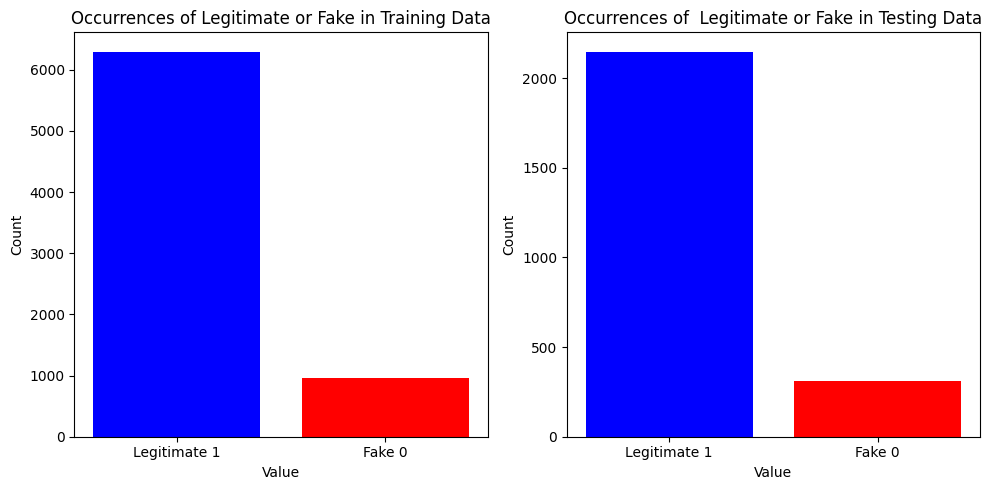

In [21]:
count_occurrence_Y_Train_Y_Test (train_y , test_y)

## b) confusion matrixes and F1 scores

### Bernoulli Naive Bayes

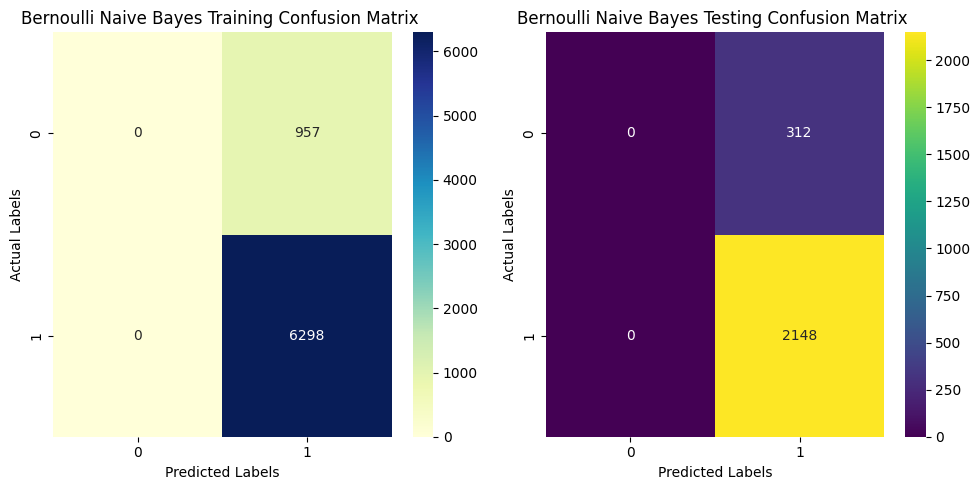


Bernoulli Naive Bayes Training F1 Score 92.93883273076071 %
Bernoulli Naive Bayes Testing F1 Score  93.22916666666667 %



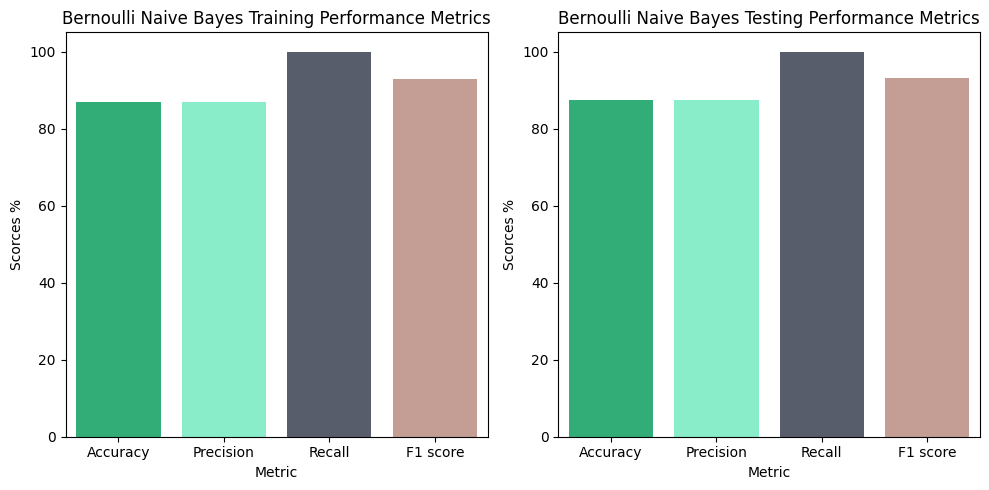

In [22]:
Classifiers("Bernoulli Naive Bayes", train_x,train_y,test_x,test_y)

### K-Nearest Neighbors

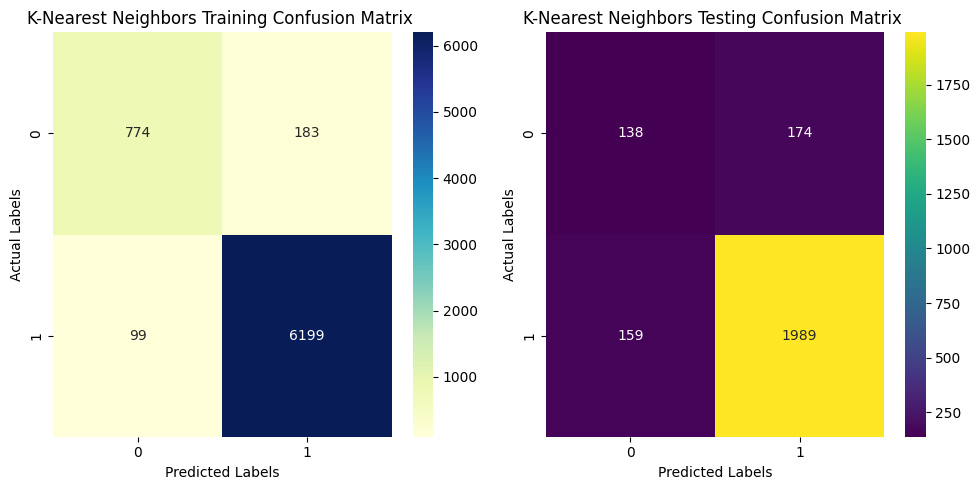


K-Nearest Neighbors Training F1 Score 97.77602523659307 %
K-Nearest Neighbors Testing F1 Score  92.27557411273487 %



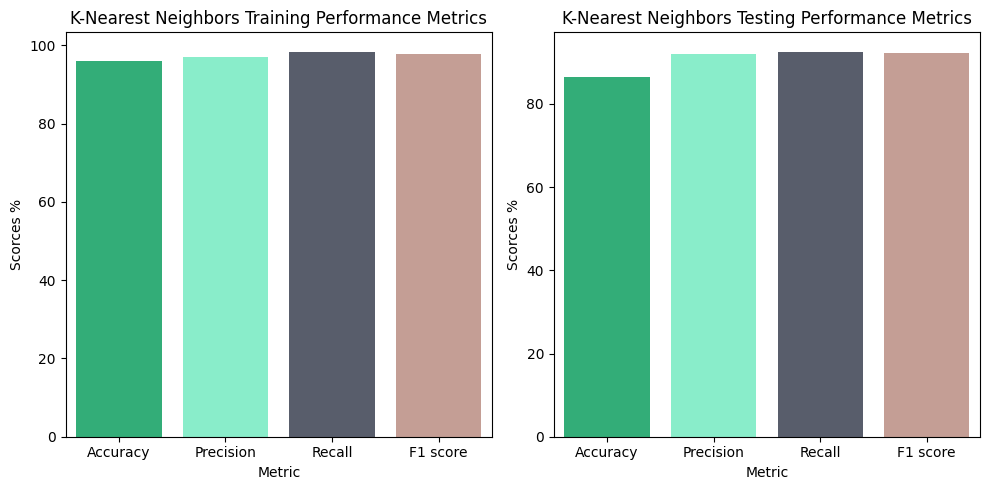

In [23]:
Classifiers("K-Nearest Neighbors", train_x,train_y,test_x,test_y)

## c) TSNE

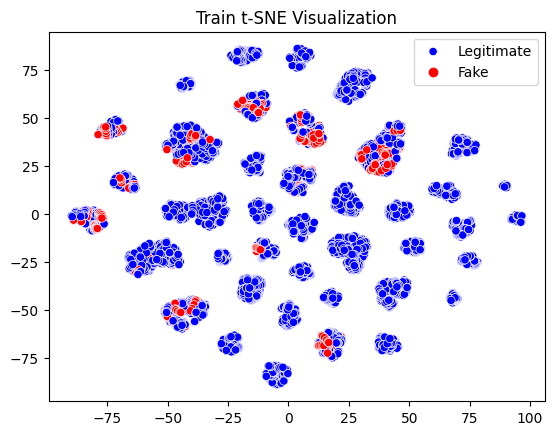

In [24]:
tsne (train_x,train_y,'Train t-SNE Visualization')

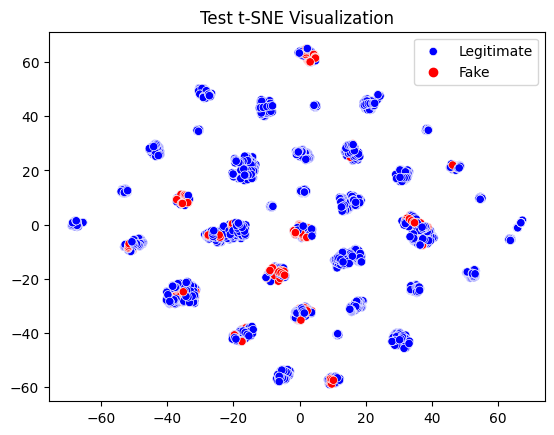

In [25]:
tsne (test_x,test_y,'Test t-SNE Visualization')

# **2)** Dimensionality Reduction (PCA) (AE)

In [26]:
BNB = {'PCA': set(), 'AutoEncoder': set(), 'Mutual Information': set() ,'Variance Threshold': set() ,'Chi-Square': set() ,'Feacture Selection': set(), "Forward Feature Elimination":set() , "Backward Feature Elimination":set() , "Recursive Feature Elimination":set()}
Knn = {'PCA': set(), 'AutoEncoder': set(), 'Mutual Information': set() ,'Variance Threshold': set() ,'Chi-Square': set() ,'Feacture Selection': set(), "Forward Feature Elimination":set() , "Backward Feature Elimination":set() , "Recursive Feature Elimination":set()}

## a)

### PCA

In [27]:
def PCA_DR(X_Train, X_Test):

  BNB_F1_Score_PCA={}
  Knn_F1_Score_PCA={}

  for i in range(2, 11):
    #After Appling PCA
    pca = PCA(n_components=i)
    pca_X_Train = pca.fit_transform(X_Train)
    pca_X_Test = pca.transform(X_Test)

    BNB_F1_Score_PCA[i],Knn_F1_Score_PCA[i]=F1_Score(pca_X_Train,train_y,pca_X_Test,test_y)

    BNB['PCA'].add((i, BNB_F1_Score_PCA[i]))
    Knn['PCA'].add((i, Knn_F1_Score_PCA[i]))

  return BNB_F1_Score_PCA,Knn_F1_Score_PCA


Maximum of PCA-Bernoulli Naive Bayes: 93.31858407079646
Best number of n_components PCA-Bernoulli Naive Bayes: 10

Maximum of PCA-K-Nearest Neighbors: 94.81165600568585
Best number of n_components PCA-K-Nearest Neighbors: 2



<ipython-input-9-b321b6acffbc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[0].plot(RD_range_, BNB_Scores.values(),'bx-', label=RD_label ,color='Purple')
<ipython-input-9-b321b6acffbc>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(RD_range_, Knn_Scores.values(),'bx-',  label=RD_label ,color='Purple')


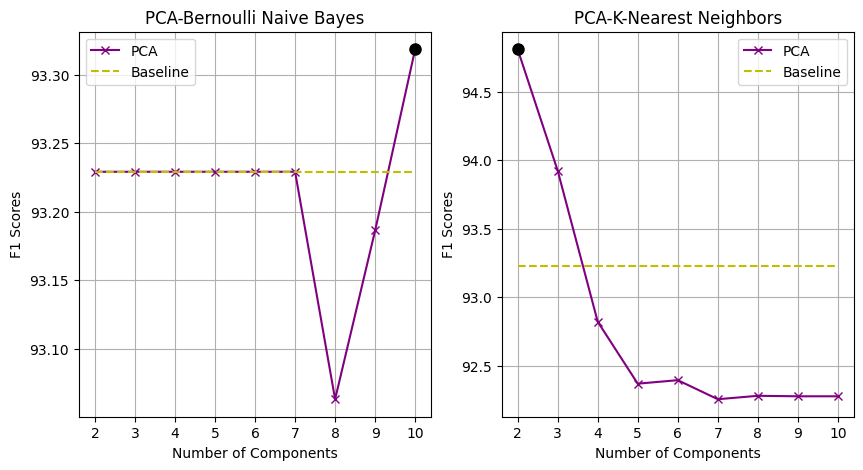

In [28]:
Baseline_BNB_Scores,Baseline_Knn_Scores=Baseline (train_x, test_x,range(2, 11))
BNB_F1_Score_PCA,Knn_F1_Score_PCA=PCA_DR(train_x, test_x)
PCA_BNB_N, PCA_BNB_value, PCA_Knn_N ,PCA_Knn_value =draw_plots(BNB_F1_Score_PCA,Knn_F1_Score_PCA,Baseline_BNB_Scores,Baseline_Knn_Scores,'PCA-Bernoulli Naive Bayes','PCA-K-Nearest Neighbors',range(2, 11),'PCA')

### AutoEncoder

In [29]:
def AutoEncoder(X_Train, X_Test):

  BNB_F1_Score_AE={}
  Knn_F1_Score_AE={}

  for i in range(10, 1,-1):

    # Train the autoencoder
    autoencoder = MLPRegressor(hidden_layer_sizes=[i], activation='relu', solver='adam', max_iter=1000)
    autoencoder.fit(X_Train, X_Train)

    # Reduce dimensionality with the trained autoencoder
    reduced_X_train = autoencoder.predict(X_Train)
    reduced_X_test = autoencoder.predict(X_Test)

    BNB_F1_Score_AE[i],Knn_F1_Score_AE[i]=F1_Score(reduced_X_train,train_y,reduced_X_test,test_y)

    BNB['AutoEncoder'].add((i,BNB_F1_Score_AE[i]))
    Knn['AutoEncoder'].add((i,Knn_F1_Score_AE[i]))

  return BNB_F1_Score_AE, Knn_F1_Score_AE


Maximum of AE-Bernoulli Naive Bayes: 93.22916666666667
Best number of n_components AE-Bernoulli Naive Bayes: 10

Maximum of AE-K-Nearest Neighbors: 92.53595069618808
Best number of n_components AE-K-Nearest Neighbors: 7



<ipython-input-9-b321b6acffbc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[0].plot(RD_range_, BNB_Scores.values(),'bx-', label=RD_label ,color='Purple')
<ipython-input-9-b321b6acffbc>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(RD_range_, Knn_Scores.values(),'bx-',  label=RD_label ,color='Purple')


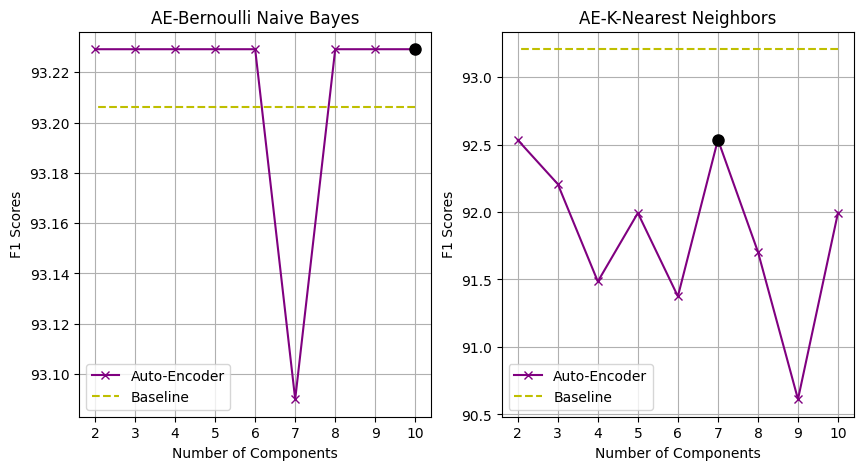

In [30]:
Baseline_BNB_Scores,Baseline_Knn_Scores=Baseline (scaled_train_x, scaled_test_x,range(2, 11))
BNB_F1_Score_AE, Knn_F1_Score_AE= AutoEncoder(scaled_train_x, scaled_test_x)
AE_BNB_N, AE_BNB_value, AE_Knn_N ,AE_Knn_value =draw_plots(BNB_F1_Score_AE,Knn_F1_Score_AE,Baseline_BNB_Scores,Baseline_Knn_Scores,'AE-Bernoulli Naive Bayes','AE-K-Nearest Neighbors',range(10, 1,-1),'Auto-Encoder')

## b) TSNE on Best Components

In [31]:
def best_tsne (best_DR ,best_N,model_name):
  if best_DR == 'PCA':
      pca = PCA(n_components=best_N, random_state=0)

      pca_X_Train = pca.fit_transform(train_x)
      tsne (pca_X_Train ,train_y,f'Train T-SNE Visualization in {model_name} using PCA')

      pca_X_Test = pca.transform(test_x)
      tsne (pca_X_Test ,test_y,f'Test T-SNE Visualization in {model_name} using PCA')

  elif best_DR == 'AutoEncoder':

    # Train the autoencoder
      autoencoder = MLPRegressor(hidden_layer_sizes=[best_N], activation='relu', solver='adam', max_iter=1000)
      autoencoder.fit(train_x, train_x)

      # Reduce dimensionality with the trained autoencoder
      reduced_X_train = autoencoder.predict(train_x)
      tsne (reduced_X_train ,train_y,f'Train T-SNE Visualization in {model_name} using Auto Encoder')

      reduced_X_test = autoencoder.predict(scaled_test_x)
      tsne (reduced_X_test ,test_y,f'Test T-SNE Visualization in {model_name} using Auto Encoder')

**Best** Dimensionality Reduction method in Bernoulli Naive Bayes

The best Dimensionality Reduction method in Bernoulli naive bayes is:
PCA , n_components =10 ,F1 Score = 93.31858407079646


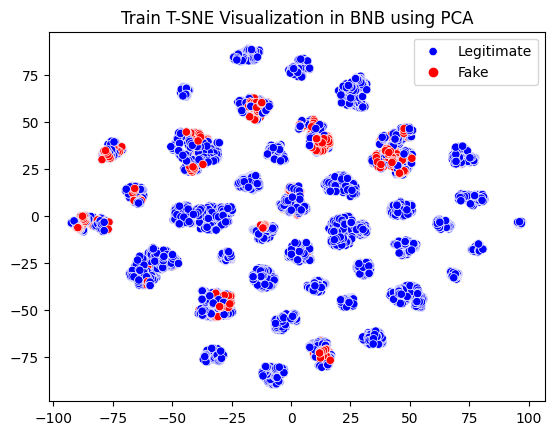

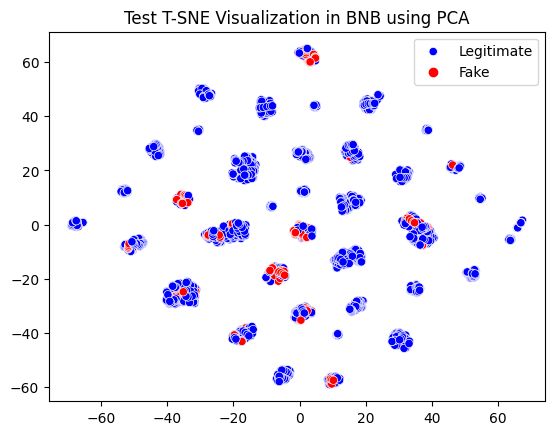

In [32]:
if PCA_BNB_value > AE_BNB_value:
    best_DR = 'PCA'
    best_N = PCA_BNB_N
    best_Value = PCA_BNB_value
else:
    best_DR = 'AutoEncoder'
    best_N = AE_BNB_N
    best_Value = AE_BNB_value

print(f"The best Dimensionality Reduction method in Bernoulli naive bayes is:\n{best_DR} , n_components ={best_N} ,F1 Score = {best_Value}")
best_tsne (best_DR ,best_N,'BNB')

Best Dimensionality Reduction method in K Nearest Neighbors

The best Dimensionality Reduction method in K Nearest Neighbors is:
PCA , n_components = 2 ,F1 Score = 94.81165600568585


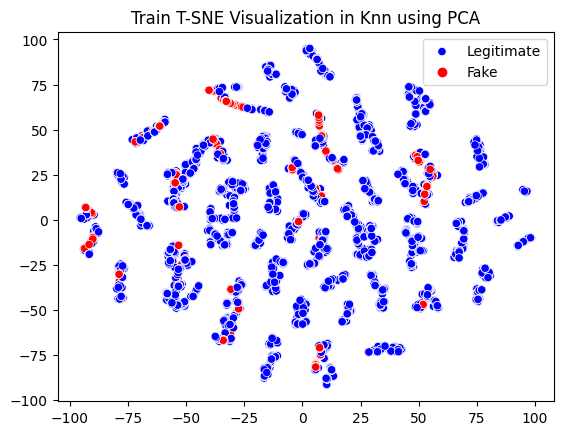

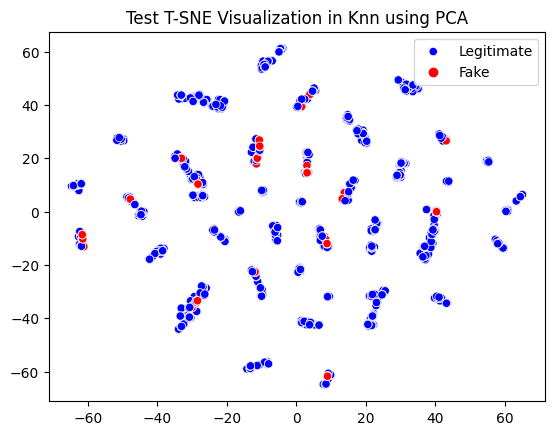

In [33]:
if PCA_Knn_value > AE_Knn_value:
    best_DR = 'PCA'
    best_N = PCA_Knn_N
    best_Value = PCA_Knn_value
else:
    best_DR = 'AutoEncoder'
    best_N = AE_Knn_N
    best_Value = AE_Knn_value

print(f"The best Dimensionality Reduction method in K Nearest Neighbors is:\n{best_DR} , n_components = {best_N} ,F1 Score = {best_Value}")
best_tsne (best_DR ,best_N ,'Knn')

# 3)Feature Selection (Filter)(Wrapper)

## a) Fliter Selection methods

In [34]:
def Feature_Select(X_train, y_train, X_test, y_test, FSM, model):
  fs = FSM
  fs.fit(X_train, y_train)
  X_train_new = fs.transform(X_train)
  X_test_new = fs.transform(X_test)
  model.fit(X_train_new, y_train)
  y_pred = model.predict(X_test_new)
  F1_Score = f1_score(y_test, y_pred) * 100

  return F1_Score

In [35]:
#Filter Methods Function
def Fliter_DR(train_X, train_Y, test_X, test_Y ,fm,fm_name):

  BNB_F1_Scores_FS= {}
  Knn_F1_Scores_FS = {}

  for i in range(2, 11):

    #apply fliter reducation
    if fm_name == 'Variance Threshold':
      fsm = VarianceThreshold(threshold=i)

    else:
      fsm =  SelectKBest(fm, k=i)

    BNB_F1_Scores_FS[i] =  Feature_Select (train_X, train_Y, test_X, test_Y, fsm,BernoulliNB())
    Knn_F1_Scores_FS[i] =  Feature_Select (train_X, train_Y, test_X, test_Y, fsm,KNeighborsClassifier())

    BNB[fm_name].add((i, BNB_F1_Scores_FS[i]))
    Knn[fm_name].add((i, Knn_F1_Scores_FS[i]))

  return BNB_F1_Scores_FS,Knn_F1_Scores_FS

### Information gain or Mutual Information


Maximum of MI-Bernoulli Naive Bayes: 93.22916666666667
Best number of n_components MI-Bernoulli Naive Bayes: 2

Maximum of MI-K-Nearest Neighbors: 98.33684703677676
Best number of n_components MI-K-Nearest Neighbors: 2



<ipython-input-9-b321b6acffbc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[0].plot(RD_range_, BNB_Scores.values(),'bx-', label=RD_label ,color='Purple')
<ipython-input-9-b321b6acffbc>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(RD_range_, Knn_Scores.values(),'bx-',  label=RD_label ,color='Purple')


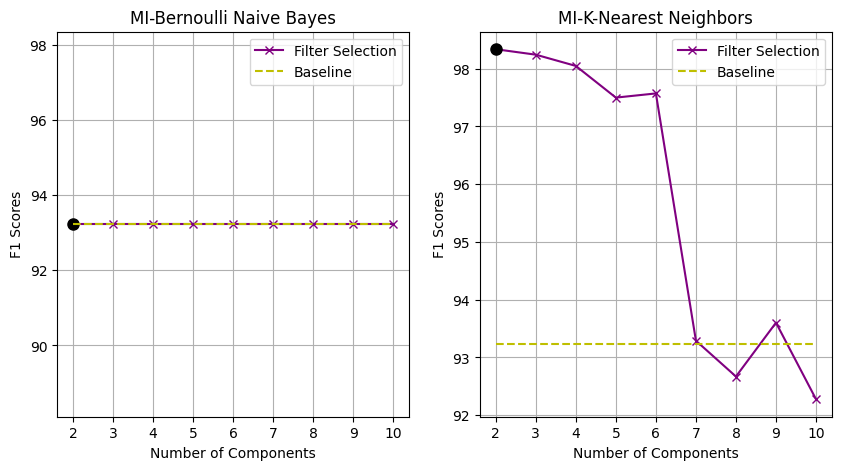

In [36]:
Baseline_BNB_Scores,Baseline_Knn_Scores=Baseline (train_x,test_x,range(2,11))
BNB_F1_Scores_MI,Knn_F1_Scores_MI= Fliter_DR(train_x, train_y,test_x, test_y,mutual_info_classif,'Mutual Information')
IG_BNB_N, IG_BNB_value, IG_Knn_N ,IG_Knn_value =draw_plots(BNB_F1_Scores_MI,Knn_F1_Scores_MI,Baseline_BNB_Scores,Baseline_Knn_Scores,'MI-Bernoulli Naive Bayes','MI-K-Nearest Neighbors',range(2, 11),'Filter Selection')

### Variance Threshold


Maximum of Variance Threshold-Bernoulli Naive Bayes: 93.22916666666667
Best number of n_components Variance Threshold-Bernoulli Naive Bayes: 2

Maximum of Variance Threshold-K-Nearest Neighbors: 92.35048678720446
Best number of n_components Variance Threshold-K-Nearest Neighbors: 9



<ipython-input-9-b321b6acffbc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[0].plot(RD_range_, BNB_Scores.values(),'bx-', label=RD_label ,color='Purple')
<ipython-input-9-b321b6acffbc>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(RD_range_, Knn_Scores.values(),'bx-',  label=RD_label ,color='Purple')


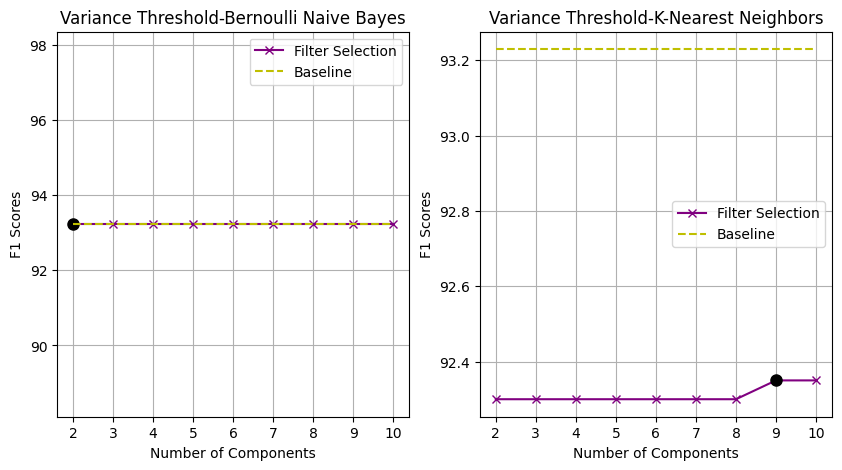

In [37]:
Baseline_BNB_Scores,Baseline_Knn_Scores=Baseline (train_x, test_x,range(2,11))
BNB_F1_Scores_VT,Knn_F1_Scores_VT= Fliter_DR(train_x, train_y, test_x, test_y,VarianceThreshold,'Variance Threshold')
VT_BNB_N, VT_BNB_value, VT_Knn_N ,VT_Knn_value =draw_plots(BNB_F1_Scores_VT,Knn_F1_Scores_VT,Baseline_BNB_Scores,Baseline_Knn_Scores,'Variance Threshold-Bernoulli Naive Bayes','Variance Threshold-K-Nearest Neighbors',range(2, 11),'Filter Selection')

### Chi-Square


Maximum of Chi-Square-Bernoulli Naive Bayes: 93.22916666666667
Best number of n_components Chi-Square-Bernoulli Naive Bayes: 2

Maximum of Chi-Square-K-Nearest Neighbors: 93.95565927654609
Best number of n_components Chi-Square-K-Nearest Neighbors: 8



<ipython-input-9-b321b6acffbc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[0].plot(RD_range_, BNB_Scores.values(),'bx-', label=RD_label ,color='Purple')
<ipython-input-9-b321b6acffbc>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(RD_range_, Knn_Scores.values(),'bx-',  label=RD_label ,color='Purple')


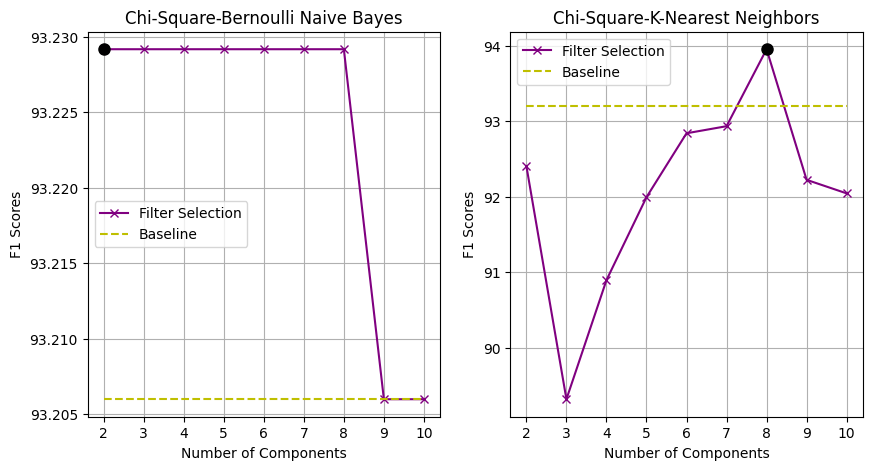

In [38]:
Baseline_BNB_Scores,Baseline_Knn_Scores=Baseline (scaled_train_x, scaled_test_x,range(2,11))
BNB_F1_Scores_chi2,Knn_F1_Scores_chi2=Fliter_DR(scaled_train_x, train_y, scaled_test_x, test_y,chi2,'Chi-Square')
CS_BNB_N, CS_BNB_value, CS_Knn_N ,CS_Knn_value =draw_plots(BNB_F1_Scores_chi2,Knn_F1_Scores_chi2,Baseline_BNB_Scores,Baseline_Knn_Scores,'Chi-Square-Bernoulli Naive Bayes','Chi-Square-K-Nearest Neighbors',range(2, 11),'Filter Selection')

### Feature Selection


Maximum of FS-Bernoulli Naive Bayes: 93.22916666666667
Best number of n_components FS-Bernoulli Naive Bayes: 2

Maximum of FS-K-Nearest Neighbors: 95.84214235377027
Best number of n_components FS-K-Nearest Neighbors: 6



<ipython-input-9-b321b6acffbc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[0].plot(RD_range_, BNB_Scores.values(),'bx-', label=RD_label ,color='Purple')
<ipython-input-9-b321b6acffbc>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(RD_range_, Knn_Scores.values(),'bx-',  label=RD_label ,color='Purple')


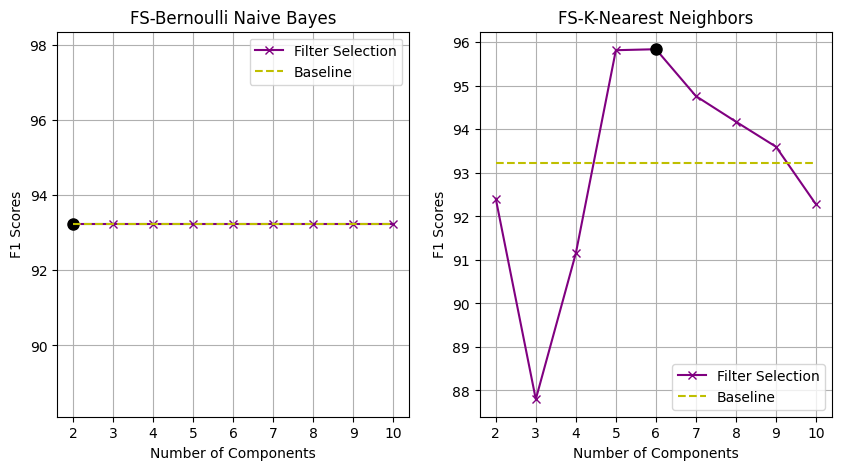

In [39]:
Baseline_BNB_Scores,Baseline_Knn_Scores=Baseline (train_x, test_x,range(2,11))
BNB_F1_Scores_FS,Knn_F1_Scores_FS= Fliter_DR(train_x, train_y, test_x, test_y,f_classif,'Feacture Selection')
FS_BNB_N, FS_BNB_value, FS_Knn_N ,FS_Knn_value =draw_plots(BNB_F1_Scores_FS,Knn_F1_Scores_FS,Baseline_BNB_Scores,Baseline_Knn_Scores,'FS-Bernoulli Naive Bayes','FS-K-Nearest Neighbors',range(2, 11),'Filter Selection')

## b) Wrapper Selection methods

In [40]:
#Filter Methods Function
def Wrapper_DR(train_X, train_Y, test_X, test_Y,w_name,d ):

  BNB_W_F1_Scores = {}
  Knn_W_F1_Scores = {}
  for i in range(2,10):

    #BNB
    # Sequential Feature Selector
    BNB_estimator = BernoulliNB()
    BNB_sfs = SequentialFeatureSelector(BNB_estimator, n_features_to_select=i, direction= d, scoring='f1')
    BNB_X_selected = BNB_sfs.fit_transform(train_x, train_y)

    # Train a model using the selected features
    BNB_estimator.fit(BNB_X_selected, train_y)
    BNB_X_test_selected = BNB_sfs.transform(test_x)
    BNB_predictions = BNB_estimator.predict(BNB_X_test_selected)

    # Calculate the f1_score
    BNB_W_F1_Scores[i]=f1_score(test_y, BNB_predictions)*100

    #KNN
    # Sequential Feature Selector
    Knn_estimator = KNeighborsClassifier()
    Knn_sfs = SequentialFeatureSelector(Knn_estimator, n_features_to_select=i, direction= d, scoring='f1')
    Knn_X_selected = Knn_sfs.fit_transform(train_x, train_y)

    # Train a model using the selected features
    Knn_estimator.fit(Knn_X_selected, train_y)
    Knn_X_test_selected = Knn_sfs.transform(test_x)
    Knn_predictions = Knn_estimator.predict(Knn_X_test_selected)

    # Calculate the f1_score
    Knn_W_F1_Scores[i]=f1_score(test_y, Knn_predictions)*100

    BNB[w_name].add((i, BNB_W_F1_Scores[i]))
    Knn[w_name].add((i, Knn_W_F1_Scores[i]))

  return BNB_W_F1_Scores, Knn_W_F1_Scores

### Forward Feature Elimination


Maximum of Forward_FE-Bernoulli Naive Bayes: 93.22916666666667
Best number of n_components Forward_FE-Bernoulli Naive Bayes: 2

Maximum of Forward_FE-K-Nearest Neighbors: 98.37990138530172
Best number of n_components Forward_FE-K-Nearest Neighbors: 4



<ipython-input-9-b321b6acffbc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[0].plot(RD_range_, BNB_Scores.values(),'bx-', label=RD_label ,color='Purple')
<ipython-input-9-b321b6acffbc>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(RD_range_, Knn_Scores.values(),'bx-',  label=RD_label ,color='Purple')


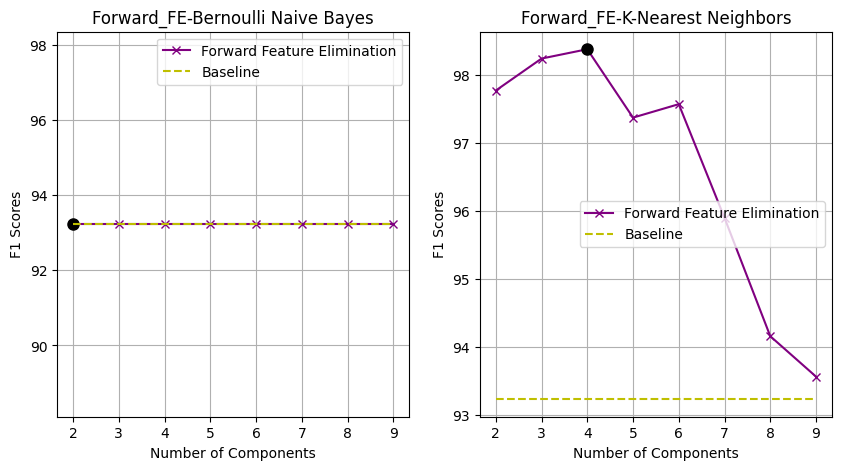

In [41]:
Baseline_BNB_Scores,Baseline_Knn_Scores=Baseline (train_x,test_x,range(2,10))
BNB_W_F1_Scores, Knn_W_F1_Scores = Wrapper_DR(train_x, train_y, test_x, test_y, "Forward Feature Elimination", 'forward')
FW_BNB_N, FW_BNB_value, FW_Knn_N ,FW_Knn_value=draw_plots( BNB_W_F1_Scores, Knn_W_F1_Scores,Baseline_BNB_Scores,Baseline_Knn_Scores, 'Forward_FE-Bernoulli Naive Bayes', 'Forward_FE-K-Nearest Neighbors', range(2, 10), 'Forward Feature Elimination')

### Back Feature Elimination


Maximum of Backward_FE-Bernoulli Naive Bayes: 93.22916666666667
Best number of n_components Backward_FE-Bernoulli Naive Bayes: 2

Maximum of Backward_FE-K-Nearest Neighbors: 98.6185904940295
Best number of n_components Backward_FE-K-Nearest Neighbors: 2



<ipython-input-9-b321b6acffbc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[0].plot(RD_range_, BNB_Scores.values(),'bx-', label=RD_label ,color='Purple')
<ipython-input-9-b321b6acffbc>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(RD_range_, Knn_Scores.values(),'bx-',  label=RD_label ,color='Purple')


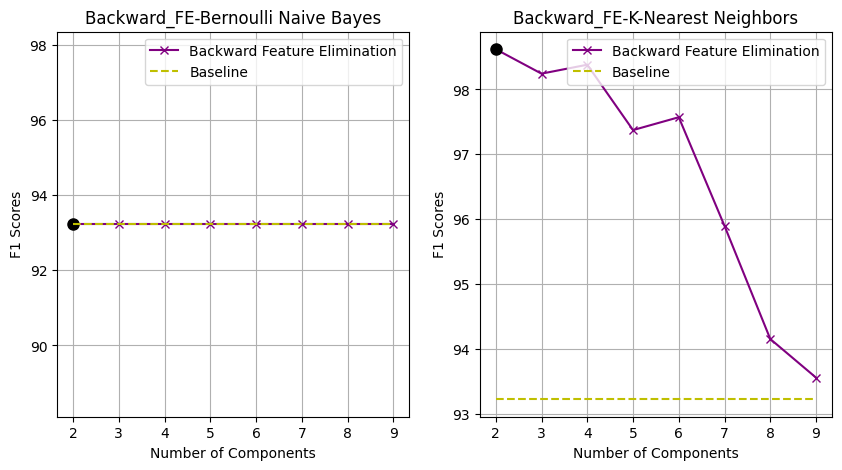

In [42]:
Baseline_BNB_Scores,Baseline_Knn_Scores=Baseline (train_x,test_x,range(2,10))
BNB_W_F1_Scores, Knn_W_F1_Scores=Wrapper_DR(train_x, train_y, test_x, test_y,"Backward Feature Elimination",'backward')
BW_BNB_N, BW_BNB_value, BW_Knn_N ,BW_Knn_value= draw_plots(BNB_W_F1_Scores, Knn_W_F1_Scores,Baseline_BNB_Scores,Baseline_Knn_Scores,'Backward_FE-Bernoulli Naive Bayes','Backward_FE-K-Nearest Neighbors',range(2,10),'Backward Feature Elimination')

### Recursive Feature Elimination

In [43]:
def compute_permutation_importances(classifier, X, y, scoring='f1', n_repeats=10, random_state=0):
    result = permutation_importance(classifier, X, y, scoring=scoring, n_repeats=n_repeats, random_state=random_state)
    return np.array(result.importances_mean)

In [44]:
BNB_RFE_F1_Scores = {}
Knn_RFE_F1_Scores= {}

def Recursive_DR(train_X, train_Y, test_X, test_Y ):

  for i in range(2,10):

    #Bernoulli Naive Bayes
    bnb_clf_rfe = BernoulliNB()
    bnb_clf_rfe.fit(train_x.iloc[:, :i], train_y)
    bnb_permutation_importances =compute_permutation_importances(bnb_clf_rfe, test_x.iloc[:, :i], test_y)

    # Apply Recursive Feature Elimination (RFE) with NB classifier and permutation importances
    rfe_nb = RFE(estimator=bnb_clf_rfe, n_features_to_select=i, importance_getter=lambda _: bnb_permutation_importances)
    X_train_rfe = rfe_nb.fit_transform(train_x, train_y)
    X_test_rfe = rfe_nb.transform(test_x)

    # Train and predict using NB classifier with RFE-selected features
    bnb_clf_rfe.fit(X_train_rfe, train_y)
    bnb_predictions = bnb_clf_rfe.predict(X_test_rfe)
    BNB_RFE_F1_Scores[i]= f1_score(test_y, bnb_predictions)*100

    #K-Nearest Neighbor(KNN)
    knn_clf_rfe = KNeighborsClassifier()
    knn_clf_rfe.fit(train_x.iloc[:, :i], train_y)
    knn_permutation_importances = compute_permutation_importances(knn_clf_rfe, test_x.iloc[:, :i], test_y)

    # Apply Recursive Feature Elimination (RFE) with NB classifier and permutation importances
    rfe_knn = RFE(estimator=knn_clf_rfe, n_features_to_select=i, importance_getter=lambda _: knn_permutation_importances)
    X_train_rfe = rfe_knn.fit_transform(train_x, train_y)
    X_test_rfe = rfe_knn.transform(test_x)

    # Train and predict using NB classifier with RFE-selected features
    knn_clf_rfe.fit(X_train_rfe,train_y)
    knn_predictions = knn_clf_rfe.predict(X_test_rfe)
    Knn_RFE_F1_Scores[i]=f1_score(test_y, knn_predictions)*100

    BNB["Recursive Feature Elimination"].add((i, BNB_RFE_F1_Scores[i]))
    Knn["Recursive Feature Elimination"].add((i, Knn_RFE_F1_Scores[i]))

  return BNB_RFE_F1_Scores,Knn_RFE_F1_Scores


Maximum of Recursive_FE-Bernoulli Naive Bayes: 93.22916666666667
Best number of n_components Recursive_FE-Bernoulli Naive Bayes: 2

Maximum of Recursive_FE-K-Nearest Neighbors: 98.33684703677676
Best number of n_components Recursive_FE-K-Nearest Neighbors: 2



<ipython-input-9-b321b6acffbc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[0].plot(RD_range_, BNB_Scores.values(),'bx-', label=RD_label ,color='Purple')
<ipython-input-9-b321b6acffbc>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(RD_range_, Knn_Scores.values(),'bx-',  label=RD_label ,color='Purple')


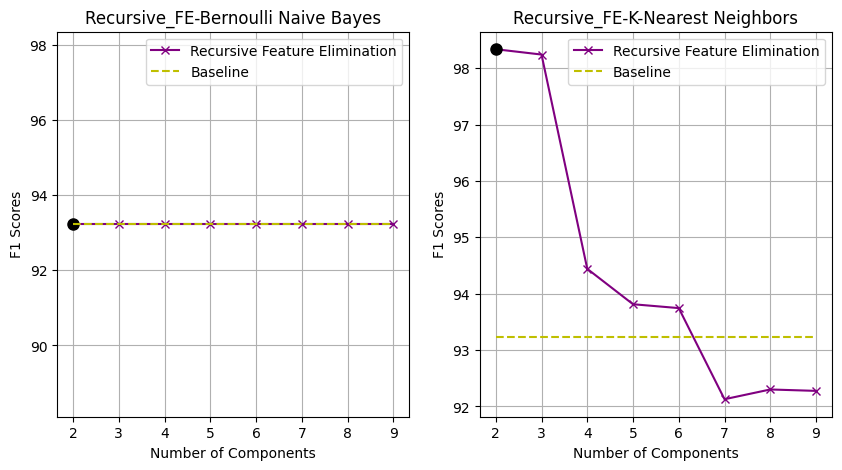

In [45]:
Baseline_BNB_Scores,Baseline_Knn_Scores=Baseline (train_x,test_x,range(2,10))
BNB_RFE_F1_Scores,Knn_RFE_F1_Scores= Recursive_DR(train_x, train_y, test_x, test_y)
RFE_BNB_N, RFE_BNB_value, RFE_Knn_N ,RFE_Knn_value= draw_plots(BNB_RFE_F1_Scores,Knn_RFE_F1_Scores,BNB_RFE_F1_Scores,Knn_RFE_F1_Scores,'Recursive_FE-Bernoulli Naive Bayes','Recursive_FE-K-Nearest Neighbors',range(2,10),'Recursive Feature Elimination')

## c) TSNE on Best Componets

Best Dimensionality Reduction method in Filter Methods




In [46]:
# Determine the maximum value and its corresponding information
F_max_value = max(IG_BNB_value, IG_Knn_value, VT_BNB_value, VT_Knn_value, CS_BNB_value, CS_Knn_value, FS_BNB_value, FS_Knn_value)

# Check which variable has the maximum value
if F_max_value == IG_BNB_value:
    F_max_N = IG_BNB_N
    F_max_name = 'Information Gain_BNB'
elif F_max_value == IG_Knn_value:
    F_max_N = IG_Knn_N
    F_max_name = 'Information Gain_Knn'
elif F_max_value == VT_BNB_value:
    F_max_N = VT_BNB_N
    F_max_name = 'Variance Threshold_BNB'
elif F_max_value == VT_Knn_value:
    F_max_N = VT_Knn_N
    F_max_name = 'Variance Threshold_Knn'
elif F_max_value == CS_BNB_value:
    F_max_N = CS_BNB_N
    F_max_name = 'Chi-Square_BNB'
elif F_max_value == CS_Knn_value:
    F_max_N = CS_Knn_N
    F_max_name = 'Chi-Square _Knn'
elif F_max_value == FS_BNB_value:
    F_max_N = FS_BNB_N
    F_max_name = 'Feature Selection_BNB'
elif F_max_value == FS_Knn_value:
    F_max_N = FS_Knn_N
    F_max_name = 'Feature Selection_Knn'

# Check if the maximum value corresponds to BNB or Knn
if 'BNB' in F_max_name:
    print(f"Best Method in Bernoulli Naive Bayes is: {F_max_name}")
else:
    print(f"Best Method in K-Nearest Neighbors  is {F_max_name}")

# Print the maximum value and corresponding information
print("Maximum value:", F_max_value)
print("Corresponding N:",F_max_N)
print("Corresponding Name:", F_max_name)


Best Method in K-Nearest Neighbors  is Information Gain_Knn
Maximum value: 98.33684703677676
Corresponding N: 2
Corresponding Name: Information Gain_Knn


**Best**  Dimensionality Reduction method in Wrapper Methods

In [47]:
# Determine the maximum value and its corresponding information
W_max_value = max(FW_BNB_value,FW_Knn_value,BW_BNB_value,BW_Knn_value,RFE_BNB_value,RFE_Knn_value)

# Check which variable has the maximum value
if W_max_value == FW_BNB_value:
    W_max_N = FW_BNB_N
    W_max_name = 'Forward Feature Elimination _BNB'
elif W_max_value == FW_Knn_value:
    W_max_N = FW_Knn_N
    W_max_name = 'Forward Feature Elimination_Knn'
elif W_max_value == BW_BNB_value:
    W_max_N = BW_BNB_N
    W_max_name = 'Backward Feature Elimination_BNB'
elif W_max_value == BW_Knn_value:
    W_max_N = BW_Knn_N
    W_max_name = 'Backward Feature Elimination_Knn'
elif W_max_value == RFE_BNB_value:
    W_max_N = RFE_BNB_N
    W_max_name = 'Recursive Feature Elimination_BNB'
elif W_max_value == RFE_Knn_value:
    W_max_N = RFE_Knn_N
    W_max_name = 'Recursive Feature Elimination_Knn'

# Check if the maximum value corresponds to BNB or Knn
if 'BNB' in W_max_name:
    print(f"Best Method in Bernoulli Naive Bayes is {W_max_name}")
else:
    print(f"Best Method in K-Nearest Neighbors  is {W_max_name}")

# Print the maximum value and corresponding information
print("Maximum value:", W_max_value)
print("Corresponding N:", W_max_N)
print("Corresponding Name:", W_max_name)


Best Method in K-Nearest Neighbors  is Backward Feature Elimination_Knn
Maximum value: 98.6185904940295
Corresponding N: 2
Corresponding Name: Backward Feature Elimination_Knn


In [48]:
# Determine the maximum value and its corresponding information
max_value = max(F_max_value, W_max_value)

# Check which variable has the maximum value
if max_value == F_max_value:
    max_N = F_max_N
    max_name = F_max_name
else:
    max_N = W_max_N
    max_name = W_max_name

# Check if the maximum value corresponds to BNB or Knn
if 'BNB' in max_name:
    print(f"Best Method in Bernoulli Naive Bayes is {max_name}")
else:
    print(f"Best Method in K-Nearest Neighbors  is {max_name}")

# Print the maximum value and corresponding information
print("Maximum value:", max_value)
print("Corresponding N:", max_N)
print("Corresponding Name:", max_name)


Best Method in K-Nearest Neighbors  is Backward Feature Elimination_Knn
Maximum value: 98.6185904940295
Corresponding N: 2
Corresponding Name: Backward Feature Elimination_Knn


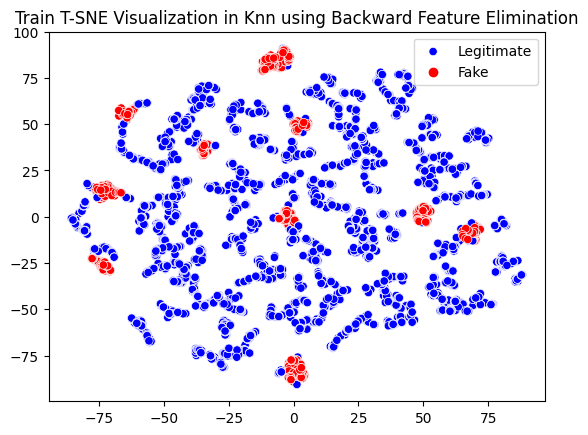

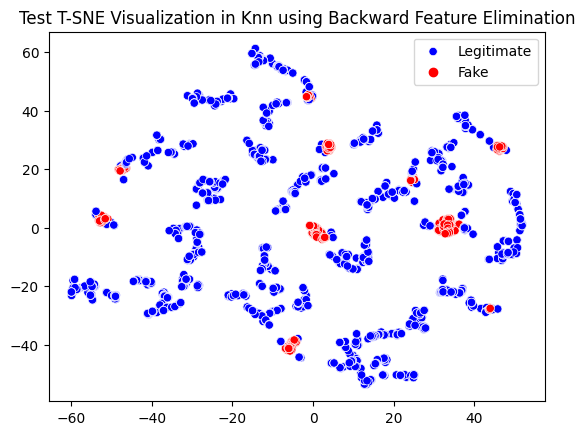

In [49]:
if  max_name == 'Information Gain_BNB':
      fs = SelectKBest(mutual_info_classif, k=max_N)
      fs.fit(train_x, train_y)
      X_train_new = fs.transform(train_x)
      X_test_new = fs.transform(test_x)
      tsne (X_train_new ,train_y,f'Train T-SNE Visualization in BNB using Information Gain')
      tsne (X_test_new ,test_y,f'Test T-SNE Visualization in BNB using Information Gain')


elif max_name == 'Information Gain_Knn':
      fs = SelectKBest(mutual_info_classif, k=max_N)
      fs.fit(train_x, train_y)
      X_train_new = fs.transform(train_x)
      X_test_new = fs.transform(test_x)
      tsne (X_train_new ,train_y,f'Train T-SNE Visualization in Knn using Information Gain')
      tsne (X_test_new ,test_y,f'Test T-SNE Visualization in Knn using Information Gain')


elif max_name == 'Variance Threshold_BNB':
    fs = VarianceThreshold(threshold=max_N)
    fs.fit(train_x, train_y)
    X_train_new = fs.transform(train_x)
    X_test_new = fs.transform(test_x)
    tsne (X_train_new ,train_y,f'Train T-SNE Visualization in BNB using Variance Threshold')
    tsne (X_test_new ,test_y,f'Test T-SNE Visualization in BNB using Variance Threshold')


elif max_name == 'Variance Threshold_Knn':
    fs = VarianceThreshold(threshold=max_N)
    fs.fit(train_x, train_y)
    X_train_new = fs.transform(train_x)
    X_test_new = fs.transform(test_x)
    tsne (X_train_new ,train_y,f'Train T-SNE Visualization in Knn using Variance Threshold')
    tsne (X_test_new ,test_y,f'Test T-SNE Visualization in Knn using Variance Threshold')


elif max_name == 'Chi-Square_BNB':
    fs = SelectKBest (chi2, k=max_N)
    fs.fit(train_x, train_y)
    X_train_new = fs.transform(train_x)
    X_test_new = fs.transform(test_x)
    tsne (X_train_new ,train_y,f'Train T-SNE Visualization in BNB using Chi-Square')
    tsne (X_test_new ,test_y,f'Test T-SNE Visualization in BNB using Chi-Square')


elif max_name == 'Chi-Square _Knn':
    fs = SelectKBest (chi2, k=max_N)
    fs.fit(train_x, train_y)
    X_train_new = fs.transform(train_x)
    X_test_new = fs.transform(test_x)
    tsne (X_train_new ,train_y,f'Train T-SNE Visualization in Knn using Chi-Square')
    tsne (X_test_new ,test_y,f'Test T-SNE Visualization in Knn using Chi-Square')


elif max_name == 'Feature Selection_BNB':
    fs = SelectKBest (f_classif, k=max_N)
    fs.fit(train_x, train_y)
    X_train_new = fs.transform(train_x)
    X_test_new = fs.transform(test_x)
    tsne (X_train_new ,train_y,f'Train T-SNE Visualization in BNB using Feature Selection')
    tsne (X_test_new ,test_y,f'Test T-SNE Visualization in BNB using Feature Selection')


elif max_name == 'Feature Selection_Knn':
    fs = SelectKBest (f_classif, k=max_N)
    fs.fit(train_x, train_y)
    X_train_new = fs.transform(train_x)
    X_test_new = fs.transform(test_x)
    tsne (X_train_new ,train_y,f'Train T-SNE Visualization in Knn using Feature Selection')
    tsne (X_test_new ,test_y,f'Test T-SNE Visualization in Knn using Feature Selection')


elif max_name == 'Forward Feature Elimination _BNB':
    BNB_estimator = BernoulliNB()
    BNB_sfs = SequentialFeatureSelector(BNB_estimator, n_features_to_select=max_name, direction= 'forward', scoring='f1')
    BNB_X_selected = BNB_sfs.fit_transform(train_x, train_y)

    # Train a model using the selected features
    BNB_estimator.fit(BNB_X_selected, train_y)
    BNB_X_test_selected = BNB_sfs.transform(test_x)

    tsne (BNB_X_selected ,train_y,f'Train T-SNE Visualization in BNN using Forward Feature Elimination')
    tsne (BNB_X_test_selected ,test_y,f'Test T-SNE Visualization in BNN using Forward Feature Elimination')

elif max_name == 'Forward Feature Elimination_Knn':
    Knn_estimator = KNeighborsClassifier()
    Knn_sfs = SequentialFeatureSelector(Knn_estimator, n_features_to_select=max_N, direction= 'forward', scoring='f1')
    Knn_X_selected = Knn_sfs.fit_transform(train_x, train_y)
    Knn_estimator.fit(Knn_X_selected, train_y)
    Knn_X_test_selected = Knn_sfs.transform(test_x)

    tsne (Knn_X_selected ,train_y,f'Train T-SNE Visualization in Knn using Forward Feature Elimination')
    tsne (Knn_X_test_selected ,test_y,f'Test T-SNE Visualization in Knn using Forward Feature Elimination')

elif max_name == 'Backward Feature Elimination_BNB':
    BNB_estimator = BernoulliNB()
    BNB_sfs = SequentialFeatureSelector(BNB_estimator, n_features_to_select=max_name, direction= 'backward', scoring='f1')
    BNB_X_selected = BNB_sfs.fit_transform(train_x, train_y)

    # Train a model using the selected features
    BNB_estimator.fit(BNB_X_selected, train_y)
    BNB_X_test_selected = BNB_sfs.transform(test_x)

    tsne (BNB_X_selected ,train_y,f'Train T-SNE Visualization in BNN using Backard Feature Elimination')
    tsne (BNB_X_test_selected ,test_y,f'Test T-SNE Visualization in BNN using Backward Feature Elimination')

elif max_name == 'Backward Feature Elimination_Knn':
    Knn_estimator = KNeighborsClassifier()
    Knn_sfs = SequentialFeatureSelector(Knn_estimator, n_features_to_select=max_N, direction= 'backward', scoring='f1')
    Knn_X_selected = Knn_sfs.fit_transform(train_x, train_y)
    Knn_estimator.fit(Knn_X_selected, train_y)
    Knn_X_test_selected = Knn_sfs.transform(test_x)

    tsne (Knn_X_selected ,train_y,f'Train T-SNE Visualization in Knn using Backward Feature Elimination')
    tsne (Knn_X_test_selected ,test_y,f'Test T-SNE Visualization in Knn using Backward Feature Elimination')


elif max_name == 'Recursive Feature Elimination_BNB':
    bnb_clf_rfe = BernoulliNB()
    bnb_clf_rfe.fit(train_x.iloc[:, :max_N], train_y)
    bnb_permutation_importances =compute_permutation_importances(bnb_clf_rfe, test_x.iloc[:, :max_N], test_y)

    # Apply Recursive Feature Elimination (RFE) with NB classifier and permutation importances
    rfe_nb = RFE(estimator=bnb_clf_rfe, n_features_to_select=i, importance_getter=lambda _: bnb_permutation_importances)
    X_train_rfe = rfe_nb.fit_transform(train_x, train_y)
    X_test_rfe = rfe_nb.transform(test_x)
    tsne (X_train_rfe ,train_y,f'Train T-SNE Visualization in BNB using Recursive Feature Elimination')
    tsne (X_test_rfe,test_y,f'Test T-SNE Visualization in BNB using Recursive Feature Elimination')


elif max_name ==  'Recursive Feature Elimination_Knn':
    knn_clf_rfe = KNeighborsClassifier()
    knn_clf_rfe.fit(train_x.iloc[:, :max_N], train_y)
    knn_permutation_importances = compute_permutation_importances(knn_clf_rfe, test_x.iloc[:, :max_N], test_y)

    # Apply Recursive Feature Elimination (RFE) with NB classifier and permutation importances
    rfe_knn = RFE(estimator=knn_clf_rfe, n_features_to_select=i, importance_getter=lambda _: knn_permutation_importances)
    X_train_rfe = rfe_knn.fit_transform(train_x, train_y)
    X_test_rfe = rfe_knn.transform(test_x)
    tsne (X_train_rfe ,train_y,f'Train T-SNE Visualization in Knn using Recursive Feature Elimination')
    tsne (X_test_rfe ,test_y,f'Test T-SNE Visualization in Knn using Recursive Feature Elimination')


## F1 Scores Performances

In [50]:
colors = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
          '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA',
          '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494',
          '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

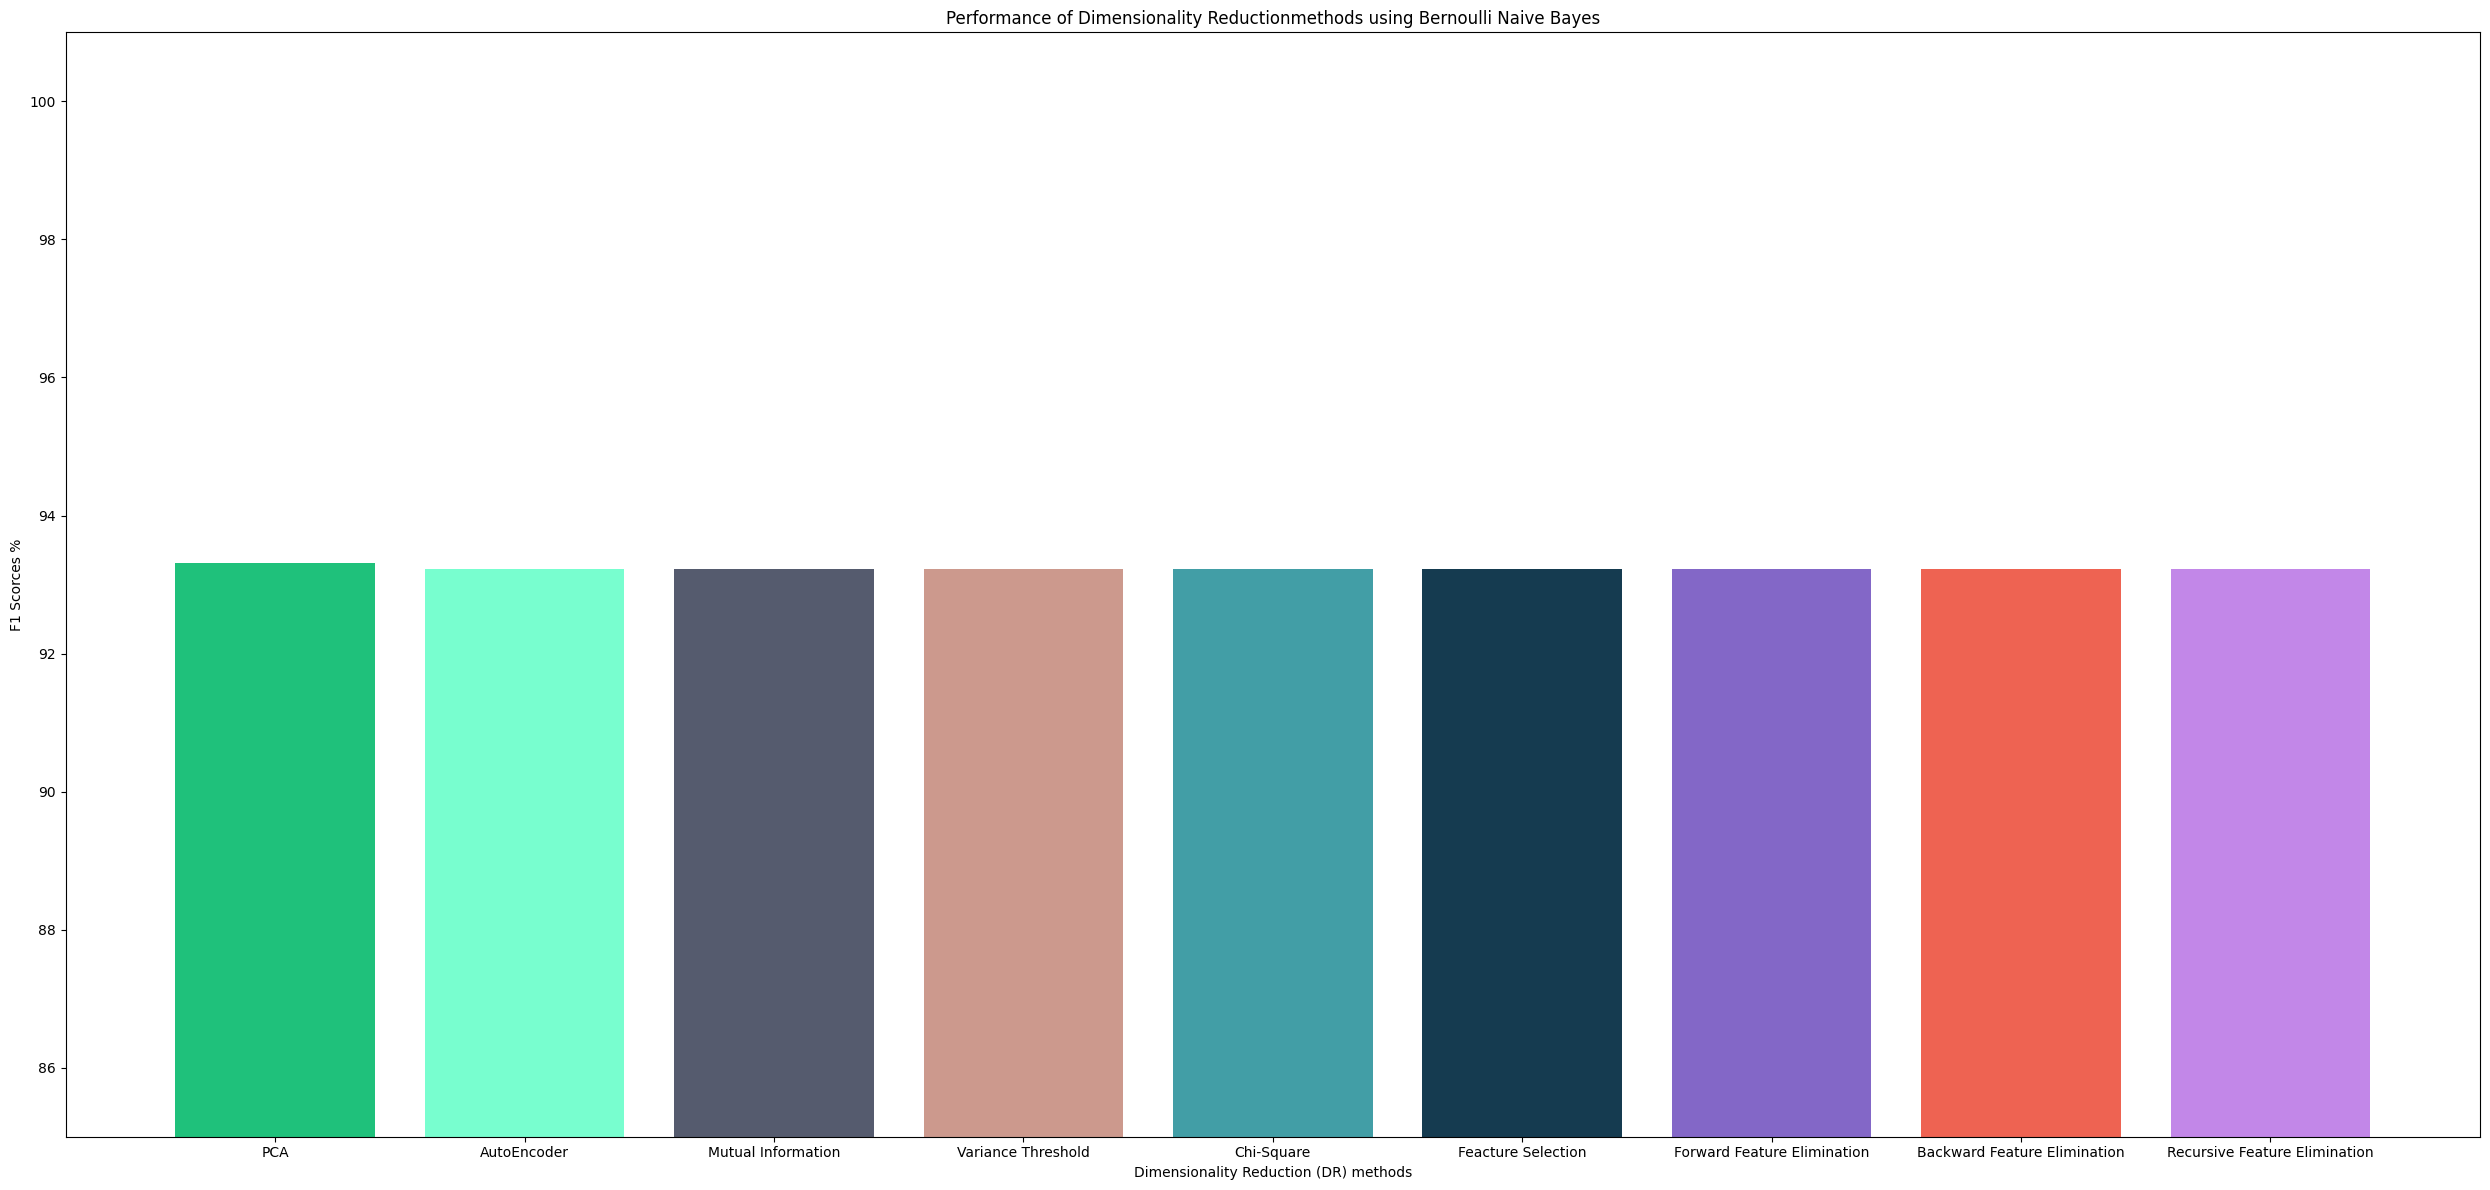

In [51]:
BNB_Performances={}
BNB_List=[]

for DR, values in BNB.items():
    for n, score in values:
      BNB_List.append(score)
    BNB_Performances[DR]=BNB_List
    BNB_List=[]

# Extract the keys and values from the data dictionary
keys = list(BNB_Performances.keys())
values = list(BNB_Performances.values())

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(25, 12))

# Creating the bar chart
for i, category_values in enumerate(values):
    x = [i] * len(category_values)  # X-coordinates for the bars
    ax.bar(x, category_values, color=colors[i % len(colors)],width=0.8, align='center')

# Configuring the x-axis labels
ax.set_xticks(range(len(keys)))
ax.set_xticklabels(keys)

# Adding labels and title
ax.set_xlabel('Dimensionality Reduction (DR) methods')
ax.set_ylabel('F1 Scorces %')
# Configuring the y-axis range
ax.set_ylim(85, 101)  # Adjust the y-axis range as desired
ax.set_title('Performance of Dimensionality Reductionmethods using Bernoulli Naive Bayes')

# Displaying the chart
plt.tight_layout()
plt.show()




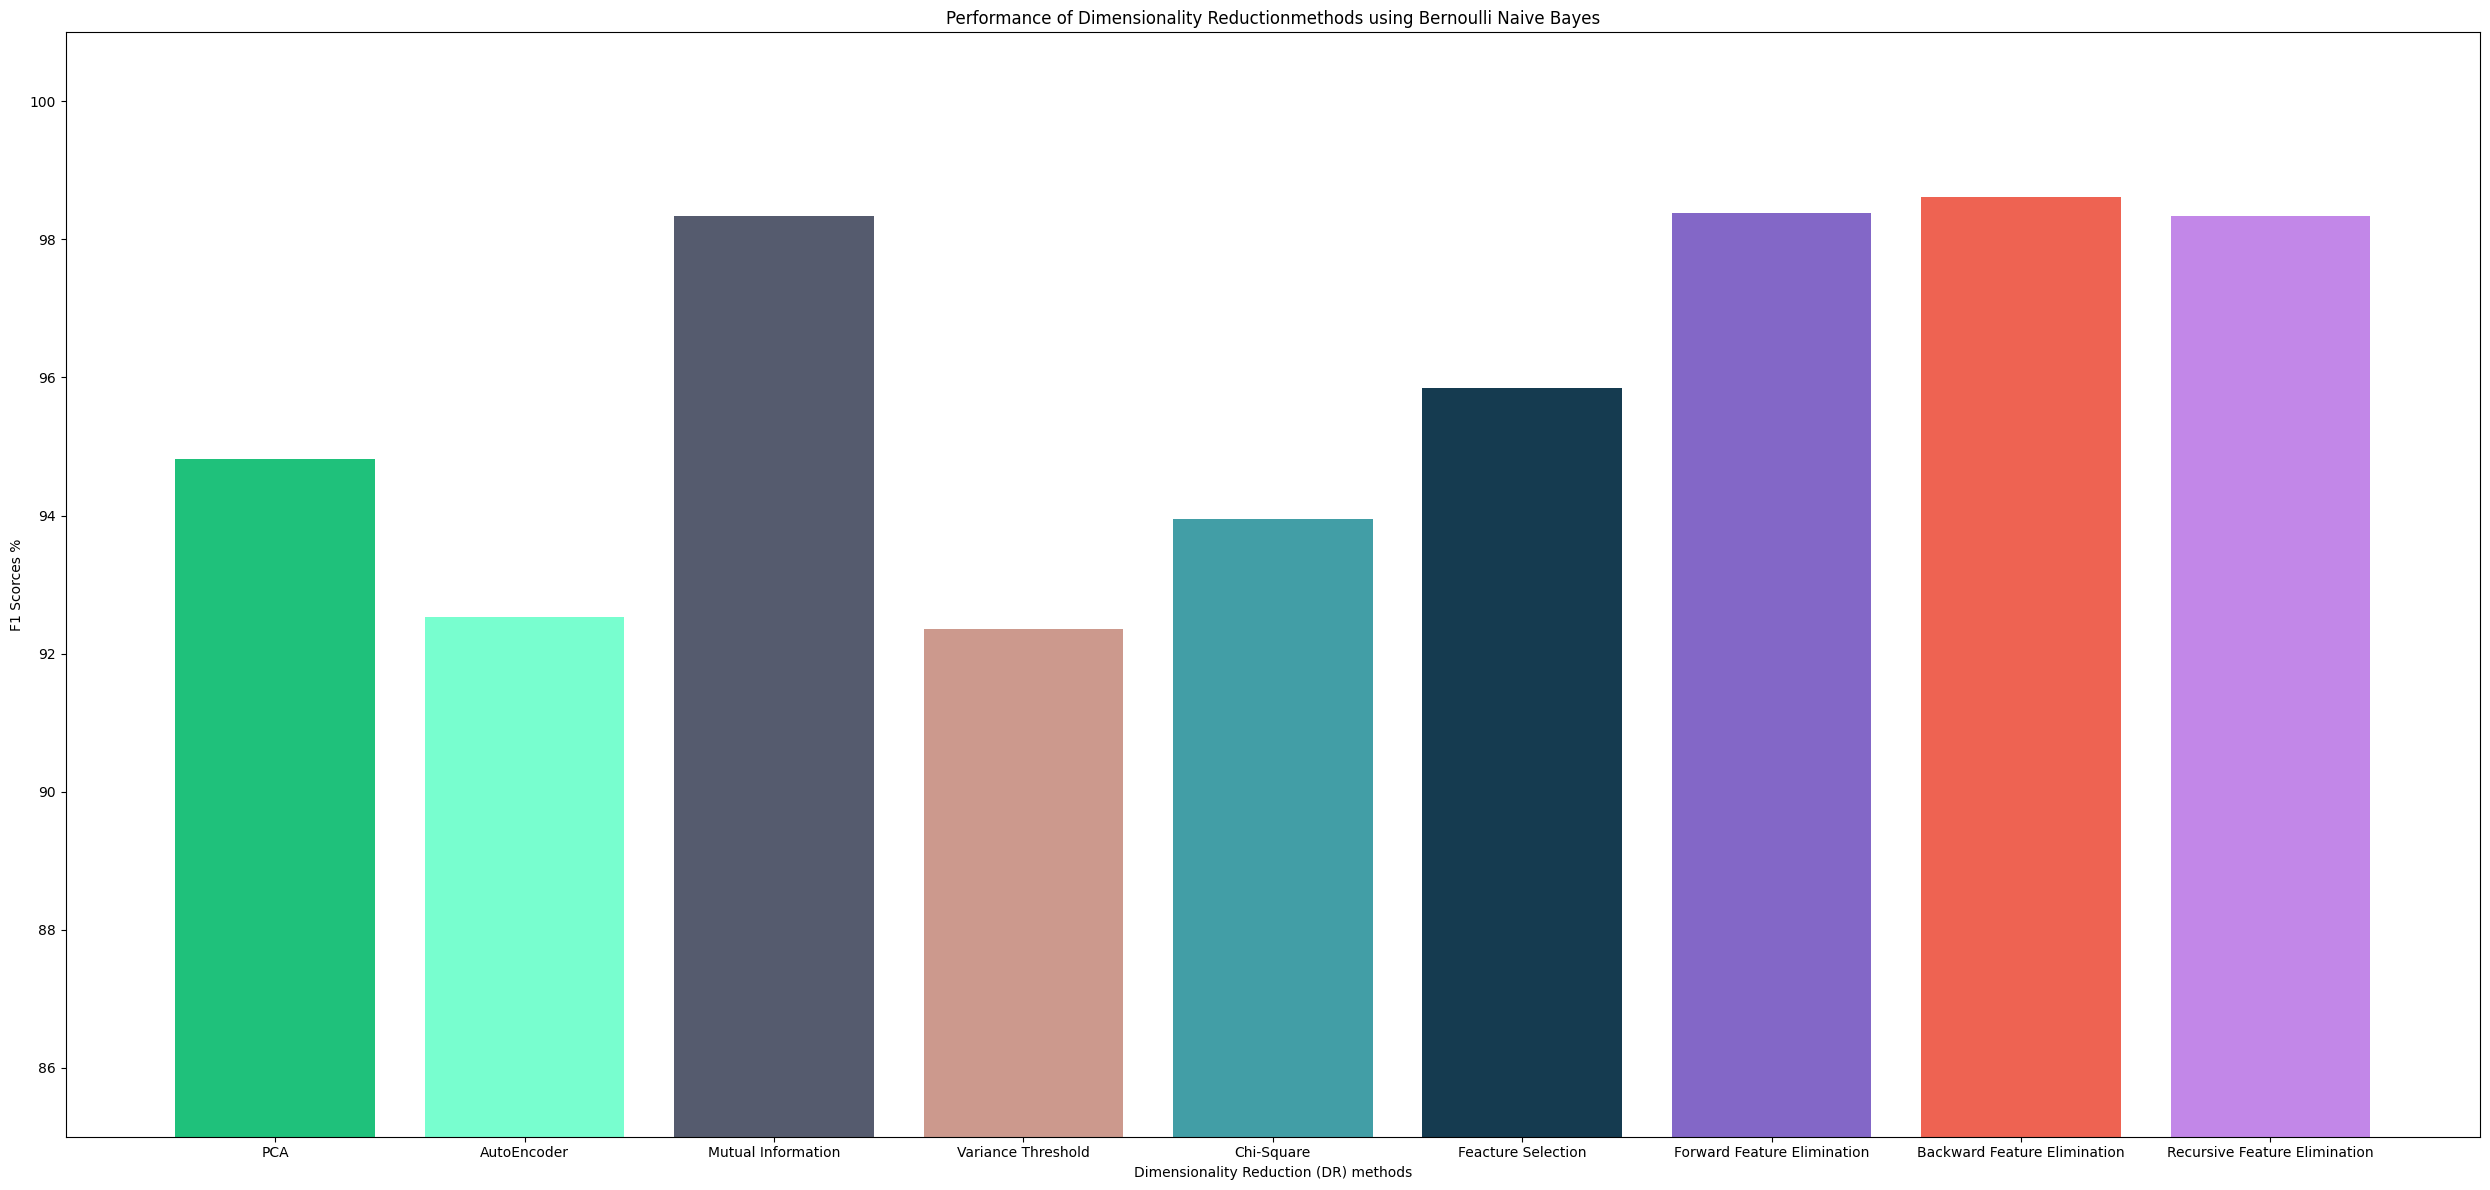

In [52]:
Knn_Performances={}
Knn_List=[]

for DR, values in Knn.items():
    for n, score in values:
      Knn_List.append(score)
    Knn_Performances[DR]=Knn_List
    Knn_List=[]

# Extract the keys and values from the data dictionary
keys = list(Knn_Performances.keys())
values = list(Knn_Performances.values())

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(25, 12))

# Creating the bar chart
for i, category_values in enumerate(values):
    x = [i] * len(category_values)  # X-coordinates for the bars
    ax.bar(x, category_values, color=colors[i % len(colors)], width=0.8, align='center')

# Configuring the x-axis labels
ax.set_xticks(range(len(keys)))
ax.set_xticklabels(keys)

# Adding labels and title
ax.set_xlabel('Dimensionality Reduction (DR) methods')
ax.set_ylabel('F1 Scorces %')
# Configuring the y-axis range
ax.set_ylim(85, 101)  # Adjust the y-axis range as desired
ax.set_title('Performance of Dimensionality Reductionmethods using Bernoulli Naive Bayes')

# Displaying the chart
plt.tight_layout()
plt.show()




# 4)Clustering

**Drop all Features except (Latitude , Longitude , Ligitimacy)**

In [53]:
train_x_for_cluster=train_x[['Latitude','Longitude']]
test_x_for_cluster=test_x[['Latitude','Longitude']]


# Scale the data
scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform (train_x_for_cluster)
X_Test_scaled = scaler.transform (test_x_for_cluster)

print(len(test_y))

2460


**Model**

In [54]:
#the next two def funtions are used to calculate the accuracy for unsupervised learning methods ONLY IF THE USED DATASET IS LABELD
def unsupervisedLabelMap(labels, y):
    labelDict = dict()
    predY_1=[]
    sum=0
    for label in unique_labels(labels):

        tmpY = y[labels == label]
        unique, count = np.unique(tmpY, return_counts=True)
        if(len(unique)==1 and unique==1):
          sum+=count
    predY_1.append(sum)
    return predY_1




**K-Means For Train**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

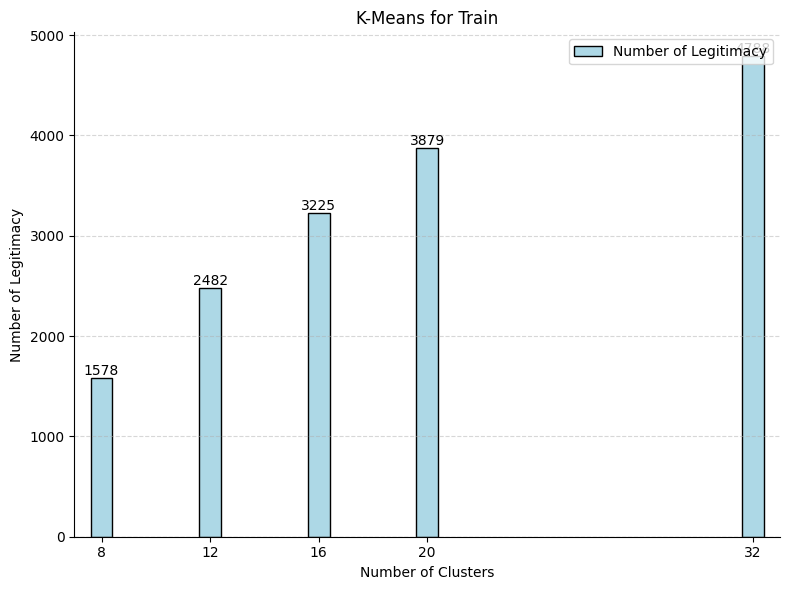

In [55]:
import matplotlib.pyplot as plt

predY_total = []
n_clusters = [8, 12, 16, 20, 32]

for r in n_clusters:
    model = KMeans(r, random_state=42)
    predClusters = model.fit_predict(train_x_for_cluster)
    predY = unsupervisedLabelMap(predClusters, train_y)
    predY_total.append(predY[0][0])

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(n_clusters, predY_total, color='lightblue', edgecolor='black')

# Adding data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height}', ha='center', va='bottom')

# Customizing the plot
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Number of Legitimacy')
ax.set_title('K-Means for Train')

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adjusting the x-axis limits and tick labels
ax.set_xlim(left=min(n_clusters) - 1, right=max(n_clusters) + 1)
ax.set_xticks(n_clusters)
ax.set_xticklabels(n_clusters)

# Adding a horizontal line at y=0
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Adding a legend
ax.legend([bars], ['Number of Legitimacy'], loc='upper right')

# Displaying the plot
plt.tight_layout()
plt.show()


**K-Means For Test**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

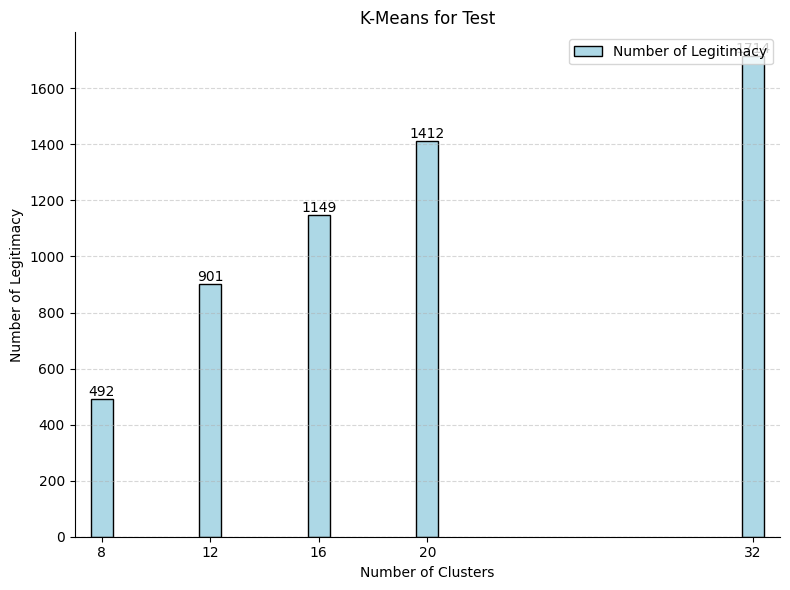

In [56]:
import matplotlib.pyplot as plt

predY_total = []
n_clusters = [8, 12, 16, 20, 32]

for r in n_clusters:
    model = KMeans(r, random_state=42)
    predClusters = model.fit_predict(test_x_for_cluster)
    predY = unsupervisedLabelMap(predClusters, test_y)
    predY_total.append(predY[0][0])

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(n_clusters, predY_total, color='lightblue', edgecolor='black')

# Adding data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height}', ha='center', va='bottom')

# Customizing the plot
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Number of Legitimacy')
ax.set_title('K-Means for Test')

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adjusting the x-axis limits and tick labels
ax.set_xlim(left=min(n_clusters) - 1, right=max(n_clusters) + 1)
ax.set_xticks(n_clusters)
ax.set_xticklabels(n_clusters)

# Adding a horizontal line at y=0
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Adding a legend
ax.legend([bars], ['Number of Legitimacy'], loc='upper right')

# Displaying the plot
plt.tight_layout()
plt.show()


**SOM for Train**

[array([1577])]
[array([2638])]
[array([3177])]
[array([3461])]
[array([4274])]


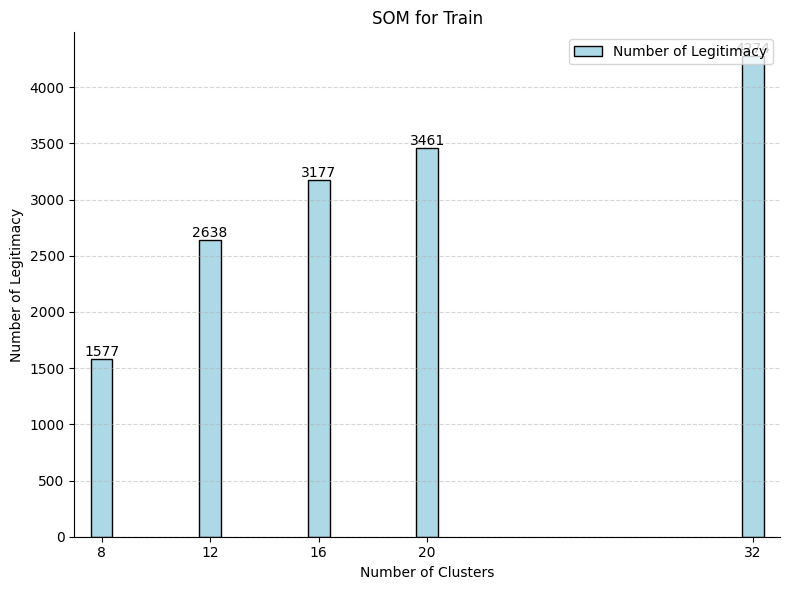

In [57]:
predY_total=[]
n_clusters=[8,12,16,20,32]
_,dim=X_Train_scaled.shape
for r in n_clusters:
  np.random.seed(0)
  model= SOM(m=r, n=1, dim=dim)
  model.fit(X_Train_scaled)
  predClusters = model.predict(X_Train_scaled)
  predY = unsupervisedLabelMap(predClusters, train_y)
  print(predY)
  predY_total.append(predY[0][0])


# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(n_clusters, predY_total, color='lightblue', edgecolor='black')

# Adding data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height}', ha='center', va='bottom')

# Customizing the plot
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Number of Legitimacy')
ax.set_title('SOM for Train')

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adjusting the x-axis limits and tick labels
ax.set_xlim(left=min(n_clusters) - 1, right=max(n_clusters) + 1)
ax.set_xticks(n_clusters)
ax.set_xticklabels(n_clusters)

# Adding a horizontal line at y=0
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Adding a legend
ax.legend([bars], ['Number of Legitimacy'], loc='upper right')

# Displaying the plot
plt.tight_layout()
plt.show()



[array([362])]
[array([1036])]
[array([1063])]
[array([1262])]
[array([1681])]


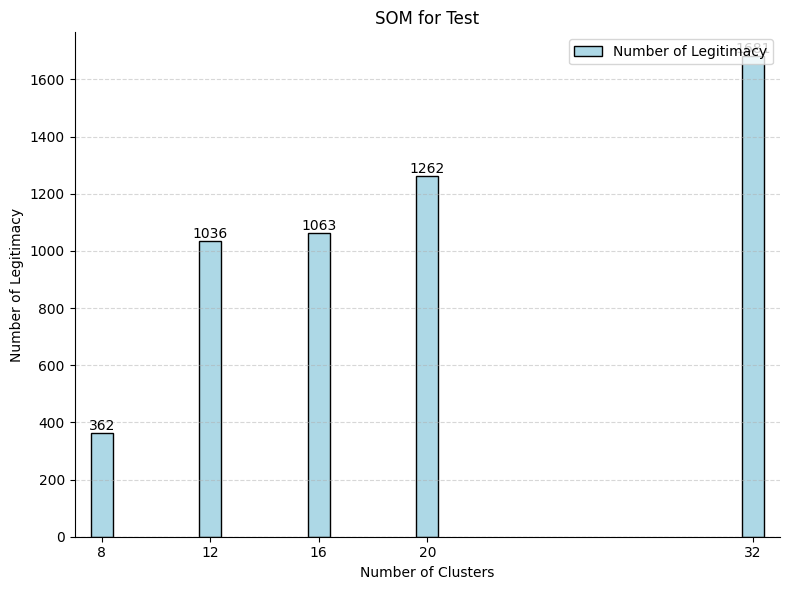

In [58]:
predY_total=[]
n_clusters=[8,12,16,20,32]
_,dim=X_Test_scaled.shape
for r in n_clusters:
  np.random.seed(0)
  model= SOM(m=r, n=1, dim=dim)
  predClusters = model.fit_predict(X_Test_scaled)
  predY = unsupervisedLabelMap(predClusters, test_y)
  print(predY)
  predY_total.append(predY[0][0])


# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(n_clusters, predY_total, color='lightblue', edgecolor='black')

# Adding data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height}', ha='center', va='bottom')

# Customizing the plot
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Number of Legitimacy')
ax.set_title('SOM for Test')

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adjusting the x-axis limits and tick labels
ax.set_xlim(left=min(n_clusters) - 1, right=max(n_clusters) + 1)
ax.set_xticks(n_clusters)
ax.set_xticklabels(n_clusters)

# Adding a horizontal line at y=0
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Adding a legend
ax.legend([bars], ['Number of Legitimacy'], loc='upper right')

# Displaying the plot
plt.tight_layout()
plt.show()



## DBSCAN

**DBSCAN For Training**

In [59]:
from sklearn.cluster import DBSCAN
n_clusters=[8,12,16,20,32]
n_cluster_generated=[]
EPS_MinSamples_Dict={}

# Create a DBSCAN object
for j in range (1,10):
  for i in np.arange(0.001,0.2,0.01):
    dbscan = DBSCAN(eps=i, min_samples=j)

    # Fit the DBSCAN model to your data
    dbscan.fit(X_Train_scaled)

    # Get the cluster labels assigned by DBSCAN
    cluster_labels = dbscan.labels_

    # Determine the number of clusters (excluding noise points)
    num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    if num_clusters in n_clusters:
        if num_clusters in n_cluster_generated:
          continue
        else:
          n_cluster_generated.append(num_clusters)

          if j in EPS_MinSamples_Dict:
                if isinstance(EPS_MinSamples_Dict[j], tuple):
                    existing_value = list(EPS_MinSamples_Dict[j])
                    existing_value.append(i)
                    EPS_MinSamples_Dict[j] = existing_value
                else:
                    EPS_MinSamples_Dict[j] = [EPS_MinSamples_Dict[j], i]
          else:
                EPS_MinSamples_Dict[j] = i
          print('num_clusters : ',num_clusters)
          print('eps = ',i)
          print('min samples = ',j)
          print()

num_clusters :  12
eps =  0.17099999999999999
min samples =  1

num_clusters :  8
eps =  0.19099999999999998
min samples =  1

num_clusters :  32
eps =  0.001
min samples =  3

num_clusters :  20
eps =  0.13099999999999998
min samples =  3

num_clusters :  16
eps =  0.12099999999999998
min samples =  7



min_samples :  1
eps :  1
Predicted :  [array([32])]
-----------------------------------------
min_samples :  1
eps :  1
Predicted :  [array([16])]
-----------------------------------------
min_samples :  3
eps :  3
Predicted :  [array([64])]
-----------------------------------------
min_samples :  3
eps :  3
Predicted :  [array([165])]
-----------------------------------------
min_samples :  7
eps :  7
Predicted :  [array([343])]
-----------------------------------------


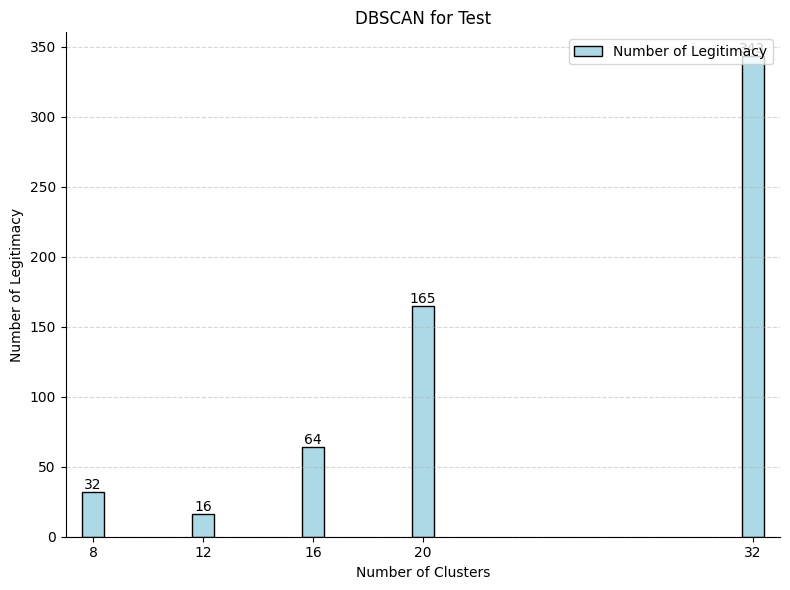

In [60]:
predY_total=[]
n_clusters=[8,12,16,20,32]
_,dim=X_Train_scaled.shape
np.random.seed(0)
dict1=EPS_MinSamples_Dict
for key in dict1:
      l = []
      values = dict1[key]
      if isinstance(values, (list, tuple)):
          l.extend(values)
      else:
          l.append(values)

      for value in l:
          print('min_samples : ',key)
          print('eps : ',key)
          model= DBSCAN(eps=value, min_samples=key)
          predClusters = model.fit_predict(X_Train_scaled)
          predY = unsupervisedLabelMap(predClusters, train_y)
          print('Predicted : ',predY)
          print('-----------------------------------------')
          predY_total.append(predY[0][0])


# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(n_clusters, predY_total, color='lightblue', edgecolor='black')

# Adding data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height}', ha='center', va='bottom')

# Customizing the plot
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Number of Legitimacy')
ax.set_title('DBSCAN for Test')

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adjusting the x-axis limits and tick labels
ax.set_xlim(left=min(n_clusters) - 1, right=max(n_clusters) + 1)
ax.set_xticks(n_clusters)
ax.set_xticklabels(n_clusters)

# Adding a horizontal line at y=0
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Adding a legend
ax.legend([bars], ['Number of Legitimacy'], loc='upper right')

# Displaying the plot
plt.tight_layout()
plt.show()



**DBSCAN For Testing**

In [61]:
from sklearn.cluster import DBSCAN
n_clusters=[8,12,16,20,32]
n_cluster_generated=[]
EPS_MinSamples_Dict={}

# Create a DBSCAN object
for j in range (1,10):
  for i in np.arange(0.001,0.2,0.01):
    dbscan = DBSCAN(eps=i, min_samples=j)

    # Fit the DBSCAN model to your data
    dbscan.fit(X_Test_scaled)

    # Get the cluster labels assigned by DBSCAN
    cluster_labels = dbscan.labels_

    # Determine the number of clusters (excluding noise points)
    num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    if num_clusters in n_clusters:
        if num_clusters in n_cluster_generated:
          continue
        else:
          n_cluster_generated.append(num_clusters)

          if j in EPS_MinSamples_Dict:
                if isinstance(EPS_MinSamples_Dict[j], tuple):
                    existing_value = list(EPS_MinSamples_Dict[j])
                    existing_value.append(i)
                    EPS_MinSamples_Dict[j] = existing_value
                else:
                    EPS_MinSamples_Dict[j] = [EPS_MinSamples_Dict[j], i]
          else:
                EPS_MinSamples_Dict[j] = i
          print('num_clusters : ',num_clusters)
          print('eps = ',i)
          print('min samples = ',j)
          print()

num_clusters :  8
eps =  0.001
min samples =  3

num_clusters :  32
eps =  0.16099999999999998
min samples =  4

num_clusters :  20
eps =  0.19099999999999998
min samples =  4

num_clusters :  16
eps =  0.16099999999999998
min samples =  9

num_clusters :  12
eps =  0.17099999999999999
min samples =  9



min_samples :  3
eps :  3
Predicted :  [array([24])]
-----------------------------------------
min_samples :  4
eps :  4
Predicted :  [array([326])]
-----------------------------------------
min_samples :  4
eps :  4
Predicted :  [array([183])]
-----------------------------------------
min_samples :  9
eps :  9
Predicted :  [array([430])]
-----------------------------------------
min_samples :  9
eps :  9
Predicted :  [array([361])]
-----------------------------------------


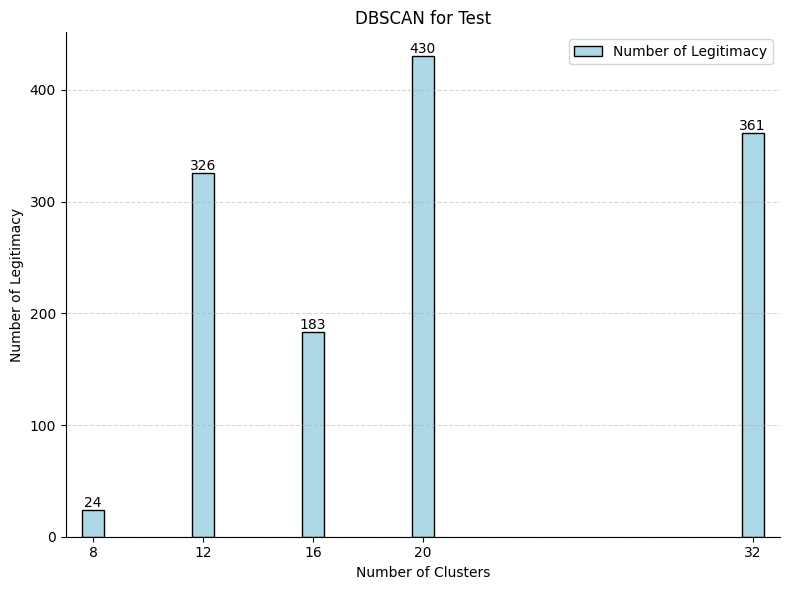

In [62]:
predY_total=[]
n_clusters=[8,12,16,20,32]
_,dim=X_Test_scaled.shape
np.random.seed(0)
dict1=EPS_MinSamples_Dict
for key in dict1:
      l = []
      values = dict1[key]
      if isinstance(values, (list, tuple)):
          l.extend(values)
      else:
          l.append(values)

      for value in l:
          print('min_samples : ',key)
          print('eps : ',key)
          model= DBSCAN(eps=value, min_samples=key)
          predClusters = model.fit_predict(X_Test_scaled)
          predY = unsupervisedLabelMap(predClusters, test_y)
          print('Predicted : ',predY)
          print('-----------------------------------------')
          predY_total.append(predY[0][0])


# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(n_clusters, predY_total, color='lightblue', edgecolor='black')

# Adding data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height}', ha='center', va='bottom')

# Customizing the plot
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Number of Legitimacy')
ax.set_title('DBSCAN for Test')

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adjusting the x-axis limits and tick labels
ax.set_xlim(left=min(n_clusters) - 1, right=max(n_clusters) + 1)
ax.set_xticks(n_clusters)
ax.set_xticklabels(n_clusters)

# Adding a horizontal line at y=0
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Adding a legend
ax.legend([bars], ['Number of Legitimacy'], loc='upper right')

# Displaying the plot
plt.tight_layout()
plt.show()

